## Решение системы уравнений упругой динамики (одномерный случай)
#### со свободной границей

In [1]:
import numpy as np
import math as m
from sympy import *
#from sympy.abc import x
import pylab as py
from JSAnimation import IPython_display
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.interpolate import interp1d
%matplotlib inline

In [2]:
print 'Enter number of segments'
n = int(raw_input()) #кол-во отрезков
print 'Enter ends of segment'
a , b = raw_input().split() #отрезок
a = float(a)
b = float(b)
h = (b - a) / n

Enter number of segments
100
Enter ends of segment
-1 1


$$
\frac{\partial \vec U}{\partial t} + A \frac{\partial \vec U}{\partial x} = 0
$$

Enter A

In [3]:
l = 1
m = 1
rho = 1

In [4]:
A = np.array([[0,0,0,-(l+2*m),0],[0,0,0,-l,0],[0,0,0,0,-m],[-1./rho,0,0,0,0],[0,0,-1./rho,0,0]])
As = [0 for i in range(n)]
for i in range(n):
    As[i] = A

In [5]:
np.shape(As)

(100, 5, 5)

In [6]:
lams = [0 for i in range(n)]
OMEGA_s = [0 for i in range(n)]
OMEGAs = [0 for i in range(n)]

In [7]:
for i in range(n):
    lam, OMEGA_ = LA.eig(As[i])
    lam = np.array([lam[2], lam[4], lam[0], lam[3], lam[1]])
    OMEGA_ = np.array([OMEGA_[:, 2], OMEGA_[:, 4], OMEGA_[:, 0], OMEGA_[:, 3], OMEGA_[:, 1]])
    OMEGA_ = np.transpose(OMEGA_)
    OMEGA = LA.inv(OMEGA_)
    lams[i] = lam
    OMEGA_s[i] = OMEGA_
    OMEGAs[i] = OMEGA

In [8]:
print lams[1]

[-1.73205081 -1.          0.          1.          1.73205081]


In [9]:
LAMBDAs = [0 for i in range(n)]
LAMBDA = np.zeros([5,5])
for j in range(n):
    for i in range(5):
        LAMBDA[i,i] = lams[j][i]
    LAMBDAs[j] = LAMBDA

In [10]:
np.shape(LAMBDAs)

(100, 5, 5)

In [11]:
TEMP = np.matmul(OMEGA_s[1], LAMBDAs[1])
print np.matmul(TEMP, OMEGAs[1])

[[ -1.54916829e-16   0.00000000e+00   0.00000000e+00  -3.00000000e+00
    0.00000000e+00]
 [  6.68533256e-17   0.00000000e+00   0.00000000e+00  -1.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -1.01465364e-17   0.00000000e+00
   -1.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00   0.00000000e+00  -6.85479099e-17
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -1.00000000e+00   0.00000000e+00
   -1.01465364e-17]]


In [12]:
nul = [0,0,0,0,0]

In [13]:
# tau = h / c *(X), такое что c*tau/h < 1
print 'Enter X for tau'
X = float(raw_input())

Enter X for tau
0.999


In [14]:
def f(x):
    if (a + 0.25*(b-a) <= x <= a + 0.5*(b-a)):
        return (x - (a + 0.25*(b-a))) / (0.25*(b-a))
    elif (a + 0.5*(b-a) <= x <= a + 0.75*(b-a)):
        return (x - (a + 0.75*(b-a))) / (-0.25*(b-a))
    else:
        return 0

In [15]:
def fp(x):
    if x >= 0:
        return f(x)
    else:
        return 0

In [16]:
def fm(x):
    if x <= 0:
        return f(x)
    else:
        return 0

In [17]:
U = np.zeros([10,n+1]) # решение
x = np.linspace(a, b, n+1) #сетка

In [18]:
#for j in range(5):
for i in range(n+1):
    U[3][i] = f(x[i])
    U[8][i] = f(x[i])

1.0


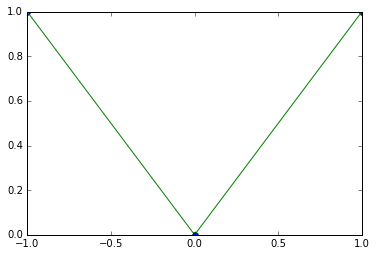

In [19]:
test = interp1d([-1, 0, 1], [1 ,0, 1])
print test(-1)
testx = np.linspace(-1, 1, 100)
testnew = test(testx)
plt.plot([-1, 0, 1], [1 ,0, 1], 'o', testx, testnew, '-')
plt.show()

In [20]:
right = interp1d(x, U[3])
right(0.135)

array(0.73)

In [21]:
print U[3]

[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4   0.44  0.48
  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88  0.92  0.96
  1.    0.96  0.92  0.88  0.84  0.8   0.76  0.72  0.68  0.64  0.6   0.56
  0.52  0.48  0.44  0.4   0.36  0.32  0.28  0.24  0.2   0.16  0.12  0.08
  0.04 -0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.  ]


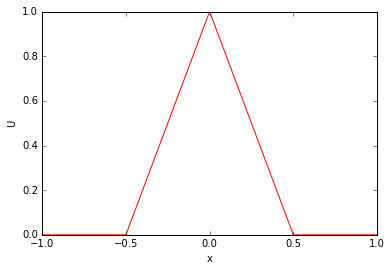

In [22]:
py.figure()
py.xlabel('x')
py.ylabel('U')
#py.ylim(0,1.1)
py.plot(x, U[3], 'r')
py.show()

In [23]:
lmax = max([max(lams[i]) for i in range(n)])
tau = h * X / lmax
print tau

0.0115354583784


In [24]:
result = []
result.append(list(U[3]))
x_ed = x[1:n]

In [25]:
print OMEGA[0]
print OMEGAs[0][0]

[ 0.60092521  0.          0.          1.040833    0.        ]
[ 0.60092521  0.          0.          1.040833    0.        ]


In [26]:
for i in range(1,n):
    '''print x[i-1], x[i] - lams[i-1][0]*tau, x[i+1]'''
    print x[i-1] <= x[i] - lams[i-1][0]*tau <= x[i+1]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [27]:
time = int(1.0 / tau) + 1
print time

87


In [28]:
lams[0]

array([-1.73205081, -1.        ,  0.        ,  1.        ,  1.73205081])

In [29]:
for j in range(2*time):
    Um = []
    Up = []
    '''
    Um.append(list([0,0,0,0,0]))
    Up.append(list([0,0,0,0,0]))
    '''
    u01 = interp1d([x[0], x[1]], [U[0][0], U[0][1]])
    u02 = interp1d([x[0], x[1]], [U[1][0], U[1][1]])
    u03 = interp1d([x[0], x[1]], [U[2][0], U[2][1]])
    u04 = interp1d([x[0], x[1]], [U[3][0], U[3][1]])
    u05 = interp1d([x[0], x[1]], [U[4][0], U[4][1]])
    B = [OMEGAs[0][0], OMEGAs[0][1], OMEGAs[0][2], np.array([1,0,0,0,0]), np.array([0,0,1,0,0])]
    u0 = [u01(x[0] - lams[0][0]*tau), u02(x[0] - lams[0][0]*tau), u03(x[0] - lams[0][0]*tau), u04(x[0] - lams[0][0]*tau), u05(x[0] - lams[0][0]*tau)]
    right = [np.matmul(OMEGAs[0][0], u0)]
    u0 = [u01(x[0] - lams[0][1]*tau), u02(x[0] - lams[0][1]*tau), u03(x[0] - lams[0][1]*tau), u04(x[0] - lams[0][1]*tau), u05(x[0] - lams[0][1]*tau)]
    right = np.append(right, np.matmul(OMEGAs[0][1], u0))
    u0 = [u01(x[0] - lams[0][2]*tau), u02(x[0] - lams[0][2]*tau), u03(x[0] - lams[0][2]*tau), u04(x[0] - lams[0][2]*tau), u05(x[0] - lams[0][2]*tau)]
    right = np.append(right, np.matmul(OMEGAs[0][2], u0))
    right = np.append(right, [0,0])
    v = np.linalg.solve(B, right)
    Um.append(list(v))
    Up.append(list(v))
    for i in range(1,n):
        u01 = interp1d([x[i-1], x[i], x[i+1]], [U[0][i-1], U[0][i], U[0][i+1]])
        u02 = interp1d([x[i-1], x[i], x[i+1]], [U[1][i-1], U[1][i], U[1][i+1]])
        u03 = interp1d([x[i-1], x[i], x[i+1]], [U[2][i-1], U[2][i], U[2][i+1]])
        u04 = interp1d([x[i-1], x[i], x[i+1]], [U[3][i-1], U[3][i], U[3][i+1]])
        u05 = interp1d([x[i-1], x[i], x[i+1]], [U[4][i-1], U[4][i], U[4][i+1]])
        B = [np.append(OMEGAs[i][0], nul), np.append(OMEGAs[i][1], nul), np.append(OMEGAs[i][2], nul), np.append(nul, OMEGAs[i-1][2]), np.append(nul, OMEGAs[i-1][3]), np.append(nul, OMEGAs[i-1][4]), np.array([0,0,0,0,1,0,0,0,0,-1]), np.array([0,0,0,1,0,0,0,0,-1,0]),np.array([1,0,0,0,0,-1,0,0,0,0]),np.array([0,0,1,0,0,0,0,-1,0,0])]
        u0 = [u01(x[i] - lams[i][0]*tau), u02(x[i] - lams[i][0]*tau), u03(x[i] - lams[i][0]*tau), u04(x[i] - lams[i][0]*tau), u05(x[i] - lams[i][0]*tau)]
        right = [np.matmul(OMEGAs[i][0], u0)]
        u0 = [u01(x[i] - lams[i][1]*tau), u02(x[i] - lams[i][1]*tau), u03(x[i] - lams[i][1]*tau), u04(x[i] - lams[i][1]*tau), u05(x[i] - lams[i][1]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i][1], u0))
        u0 = [u01(x[i] - lams[i][2]*tau), u02(x[i] - lams[i][2]*tau), u03(x[i] - lams[i][2]*tau), u04(x[i] - lams[i][2]*tau), u05(x[i] - lams[i][2]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i][2], u0))
        u0 = [u01(x[i] - lams[i-1][2]*tau), u02(x[i] - lams[i-1][2]*tau), u03(x[i] - lams[i-1][2]*tau), u04(x[i] - lams[i-1][2]*tau), u05(x[i] - lams[i-1][2]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i-1][2], u0))
        u0 = [u01(x[i] - lams[i-1][3]*tau), u02(x[i] - lams[i-1][3]*tau), u03(x[i] - lams[i-1][3]*tau), u04(x[i] - lams[i-1][3]*tau), u05(x[i] - lams[i-1][3]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i-1][3], u0))
        u0 = [u01(x[i] - lams[i-1][4]*tau), u02(x[i] - lams[i-1][4]*tau), u03(x[i] - lams[i-1][4]*tau), u04(x[i] - lams[i-1][4]*tau), u05(x[i] - lams[i-1][4]*tau)]
        right = np.append(right, np.matmul(OMEGAs[i-1][4], u0))
        right = np.append(right, [0,0,0,0])
        v = np.linalg.solve(B, right)
        Up.append(list(v[:5]))
        Um.append(list(v[5:]))
    u01 = interp1d([x[n-1], x[n]], [U[0][n-1], U[0][n]])
    u02 = interp1d([x[n-1], x[n]], [U[1][n-1], U[1][n]])
    u03 = interp1d([x[n-1], x[n]], [U[2][n-1], U[2][n]])
    u04 = interp1d([x[n-1], x[n]], [U[3][n-1], U[3][n]])
    u05 = interp1d([x[n-1], x[n]], [U[4][n-1], U[4][n]])
    B = [OMEGAs[n-1][2], OMEGAs[n-1][3], OMEGAs[n-1][4], np.array([1,0,0,0,0]), np.array([0,0,1,0,0])]
    u0 = [u01(x[n] - lams[n-1][2]*tau), u02(x[n] - lams[n-1][2]*tau), u03(x[n] - lams[n-1][2]*tau), u04(x[n] - lams[n-1][2]*tau), u05(x[n] - lams[n-1][2]*tau)]
    right = [np.matmul(OMEGAs[n-1][2], u0)]
    u0 = [u01(x[n] - lams[n-1][3]*tau), u02(x[n] - lams[n-1][3]*tau), u03(x[n] - lams[n-1][3]*tau), u04(x[n] - lams[n-1][3]*tau), u05(x[n] - lams[n-1][3]*tau)]
    right = np.append(right, np.matmul(OMEGAs[n-1][3], u0))
    u0 = [u01(x[n] - lams[n-1][4]*tau), u02(x[n] - lams[n-1][4]*tau), u03(x[n] - lams[n-1][4]*tau), u04(x[n] - lams[n-1][4]*tau), u05(x[n] - lams[n-1][4]*tau)]
    right = np.append(right, np.matmul(OMEGAs[n-1][4], u0))
    right = np.append(right, [0,0])
    v = np.linalg.solve(B, right)
    Um.append(list(v))
    Up.append(list(v))
    for i in range(5):
        U[i] = np.array(Um)[:, i]
    result.append(list(U[3]))

In [30]:
lams[n-1][4]

1.7320508075688772

[-1.0, 1.0, -1, 1]

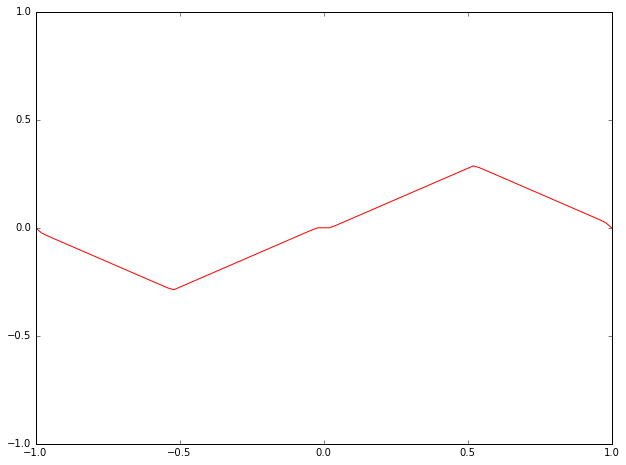

In [31]:
fig = plt.figure(figsize=(8, 6))
axis = fig.add_axes([0, 0, 1, 1])
axis.clear()
axis.plot(x, np.array(Um)[:, 1], 'r') #, x, result[1][i], 'b')
axis.axis([a, b, -1, 1])


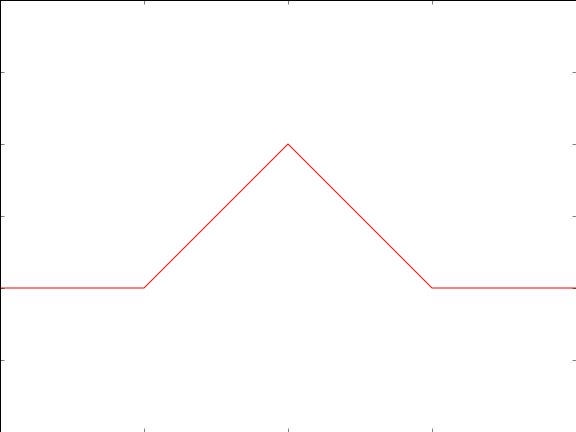
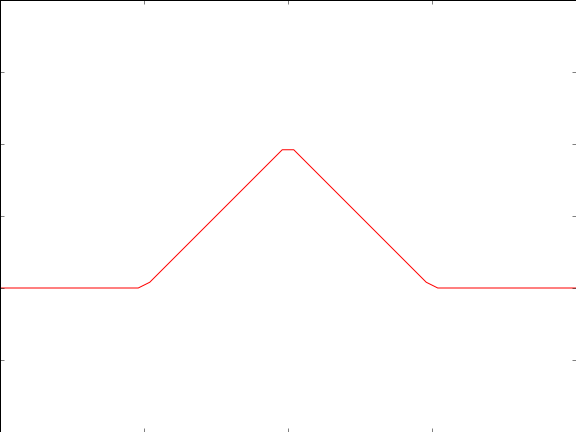
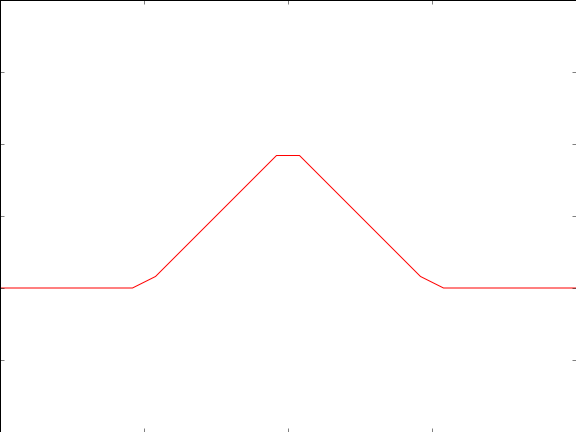
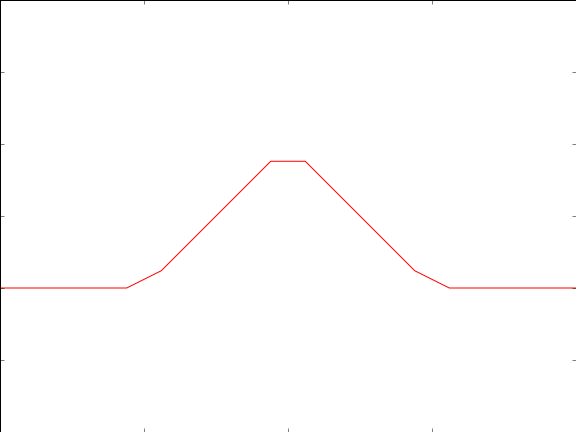
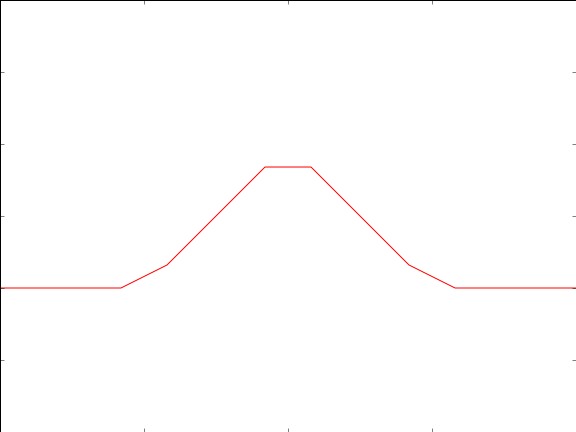
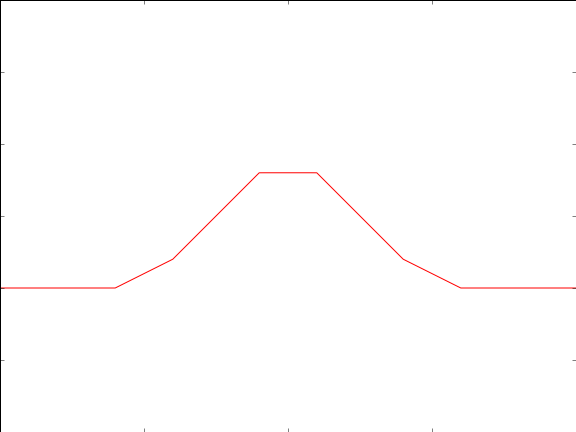
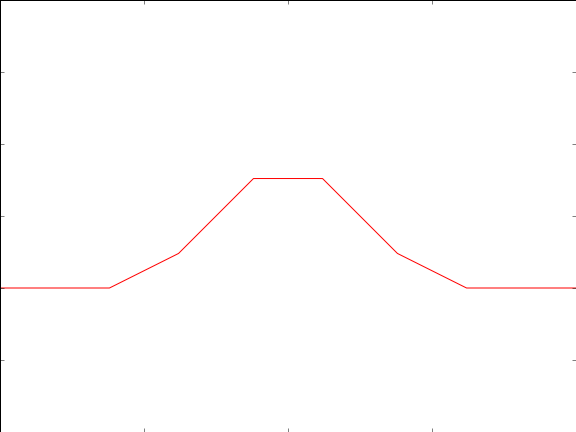
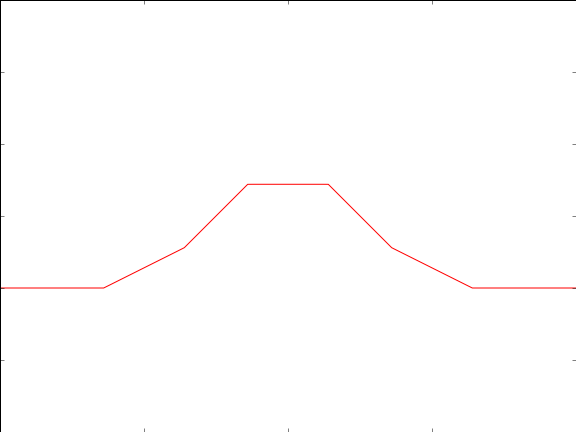
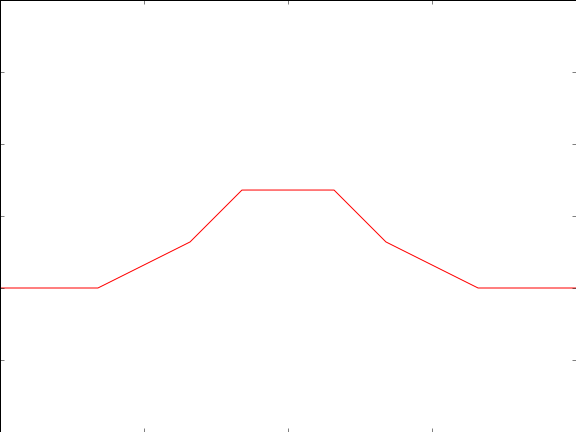
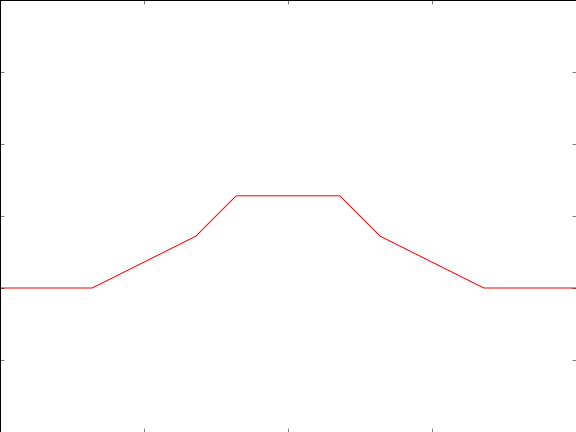
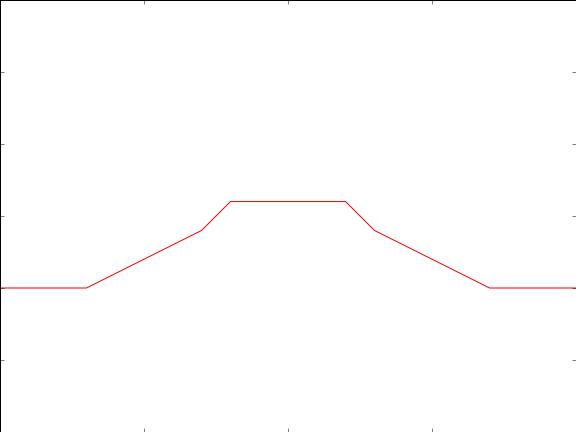
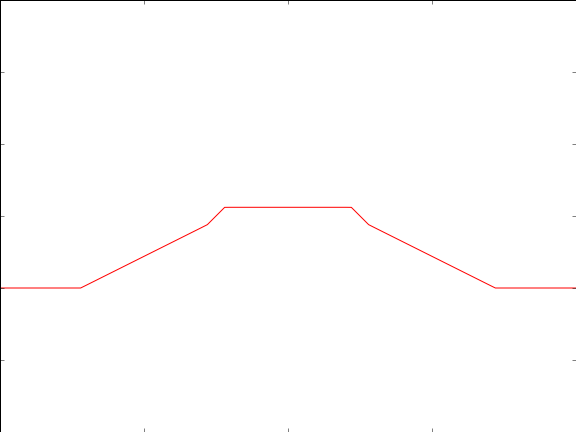
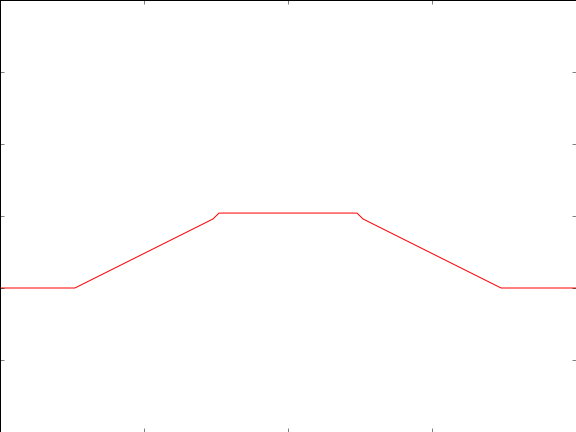
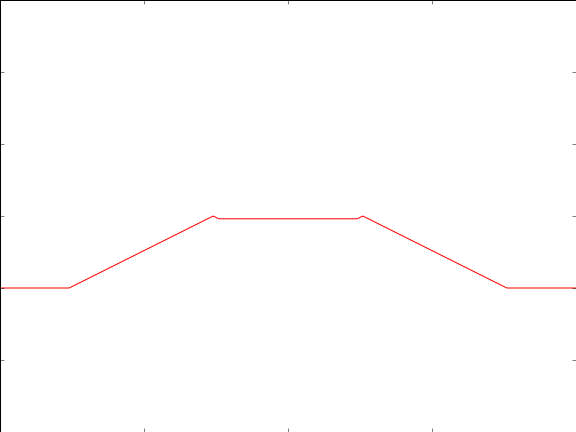
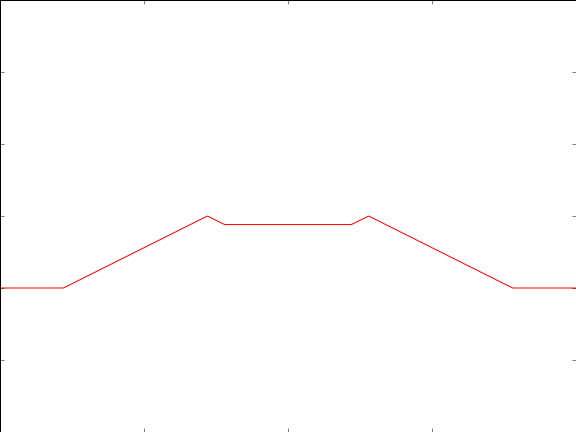
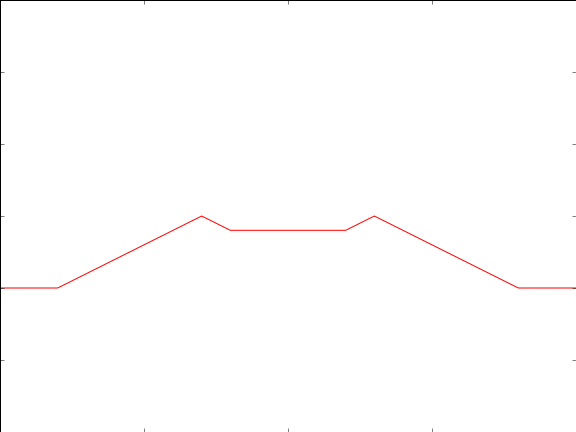
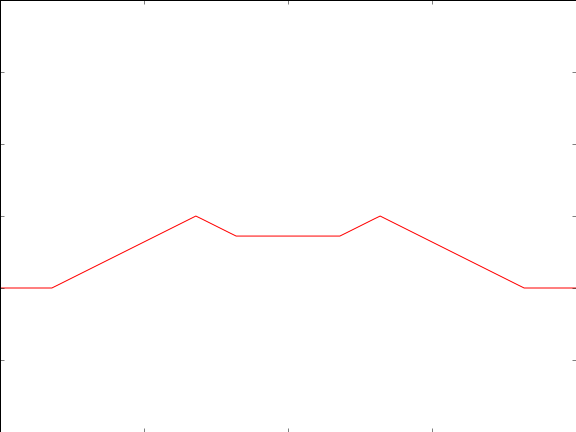
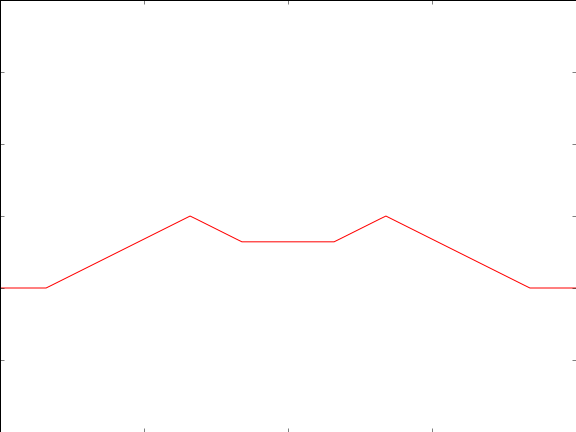
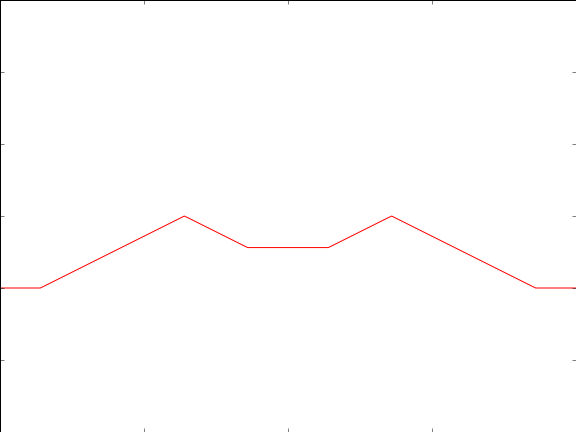
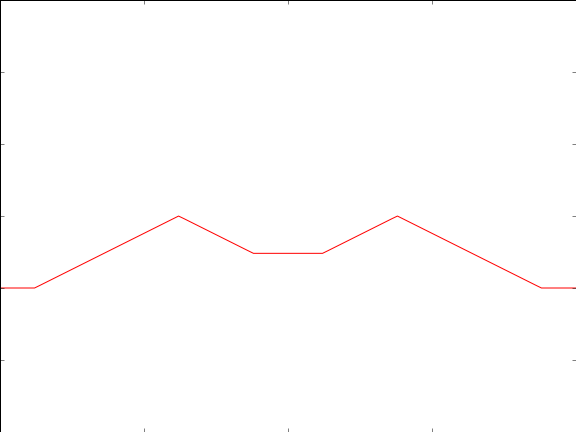
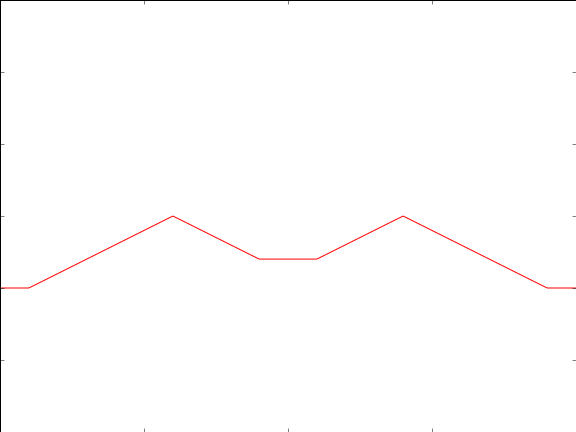
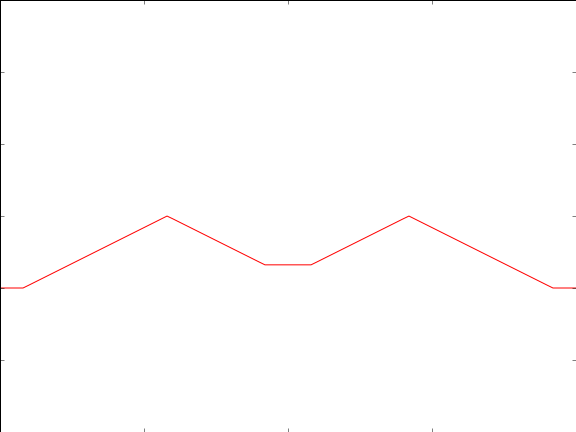
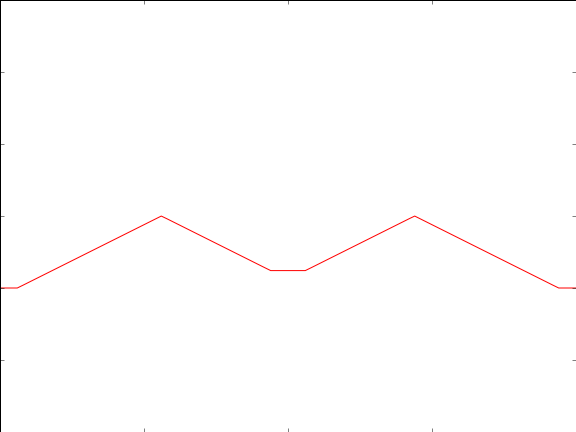
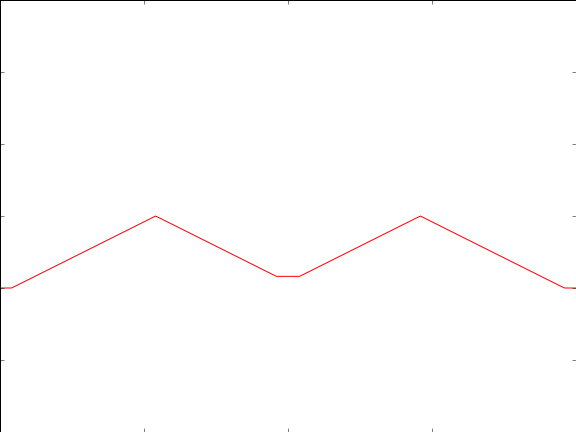
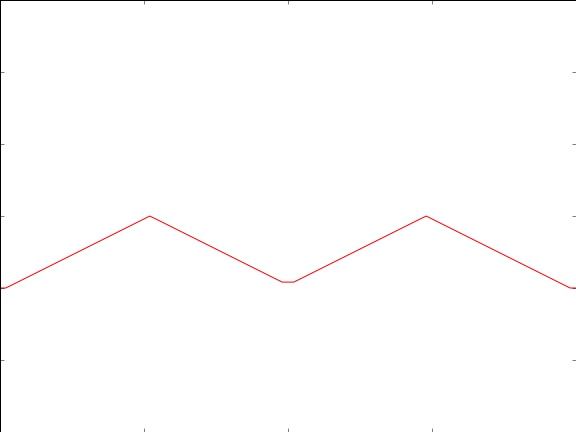
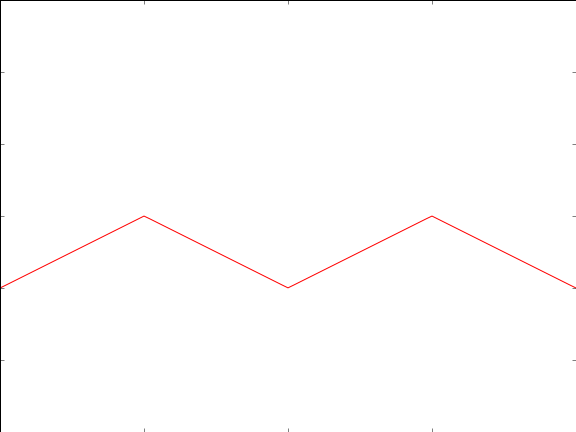
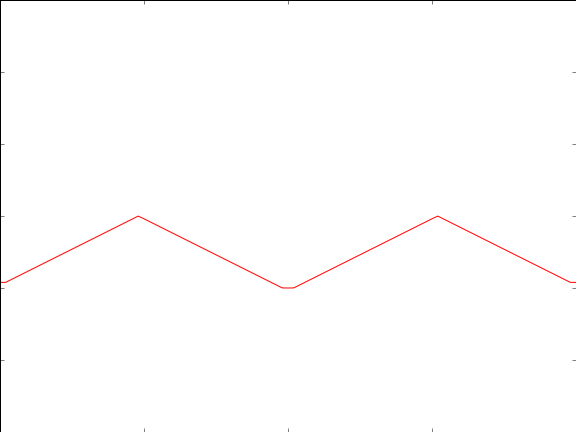
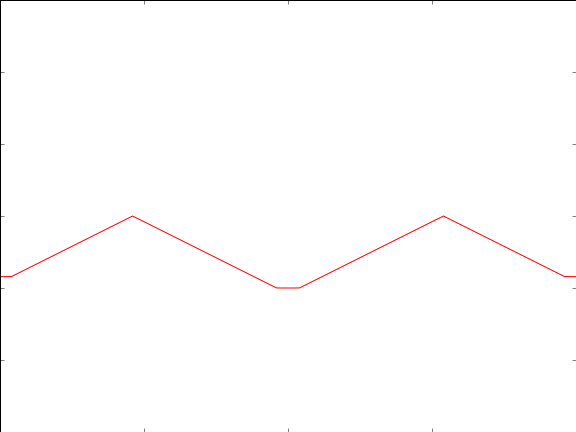
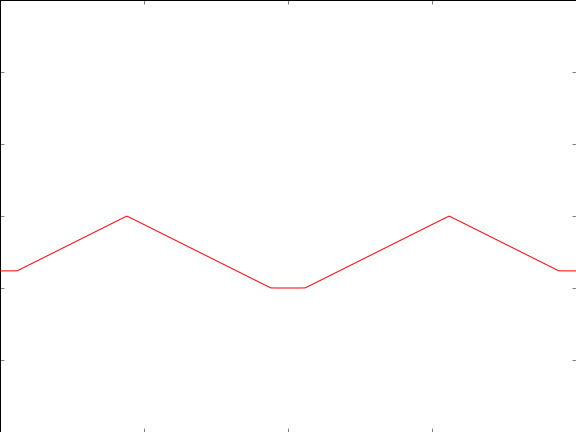
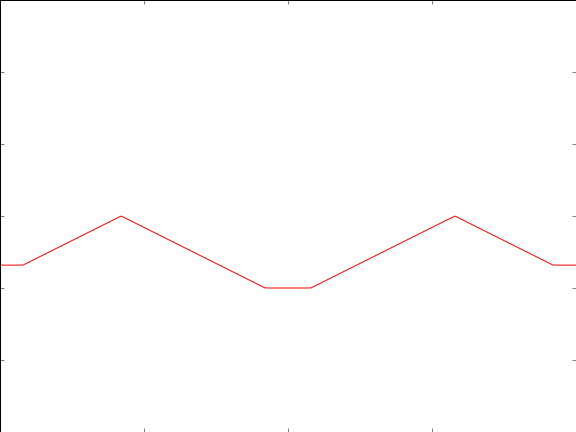
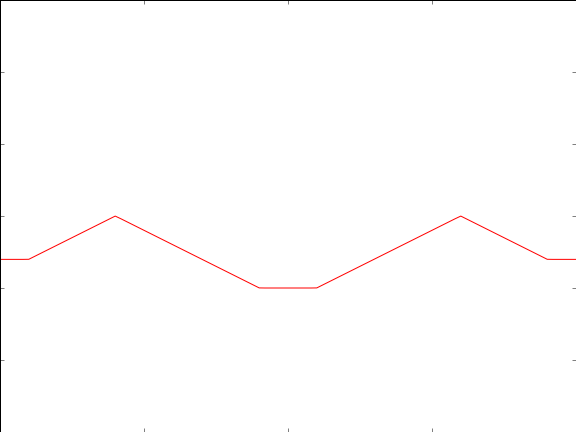
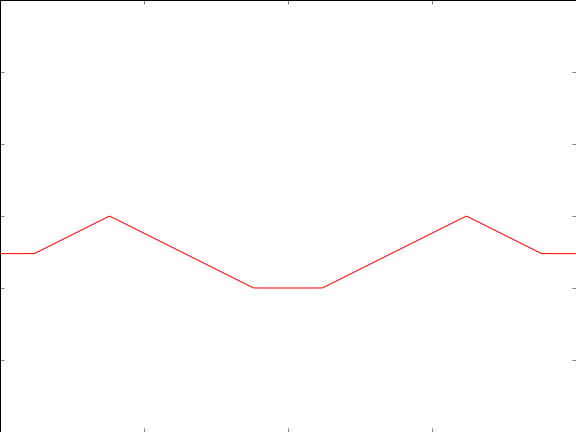
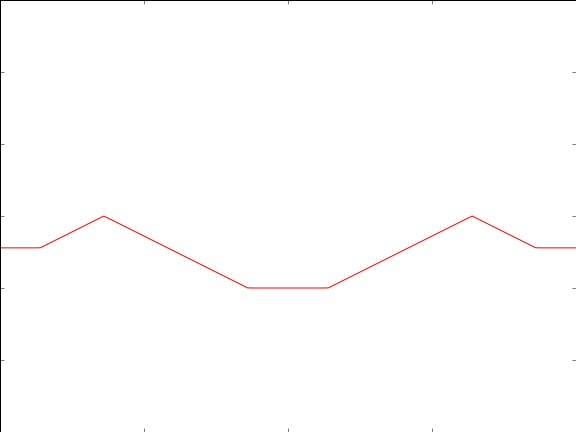
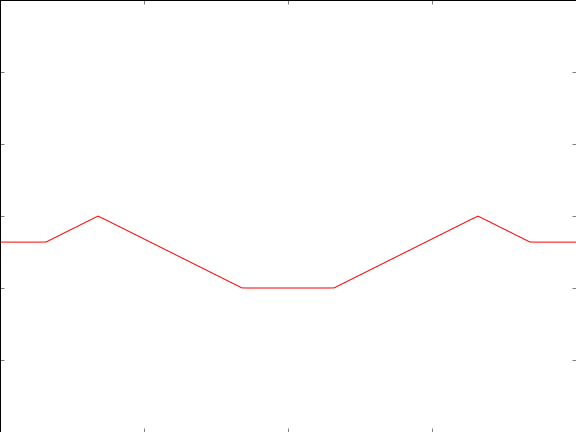
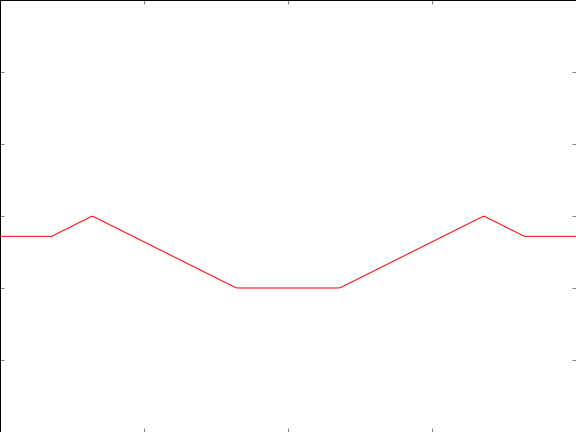
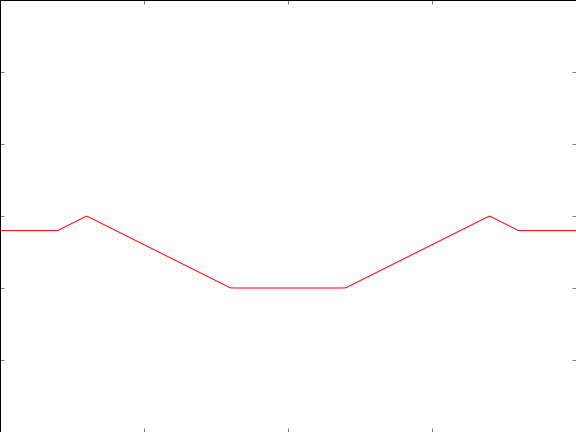
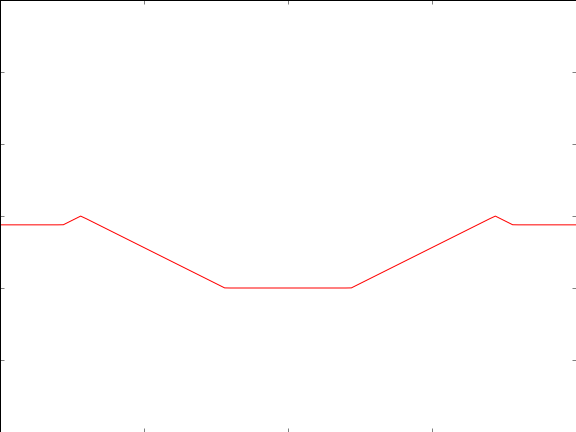
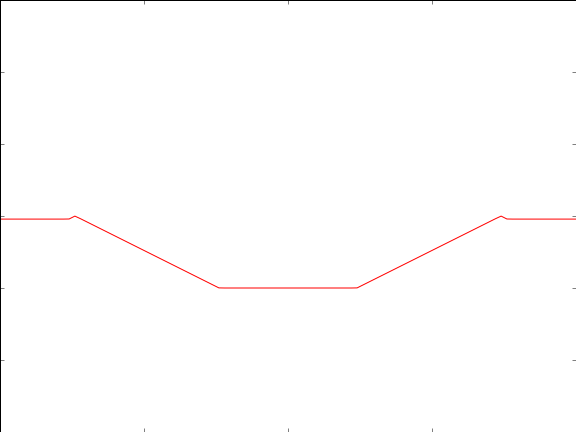
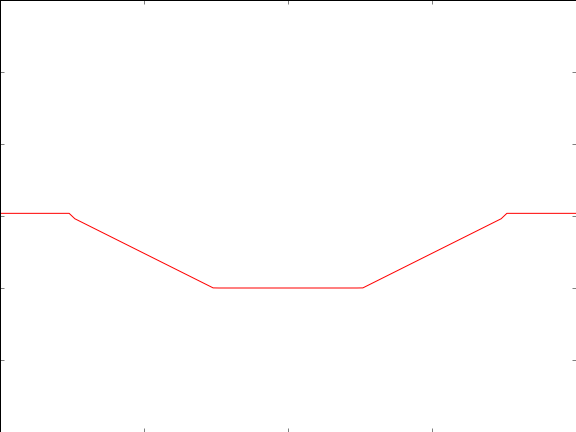
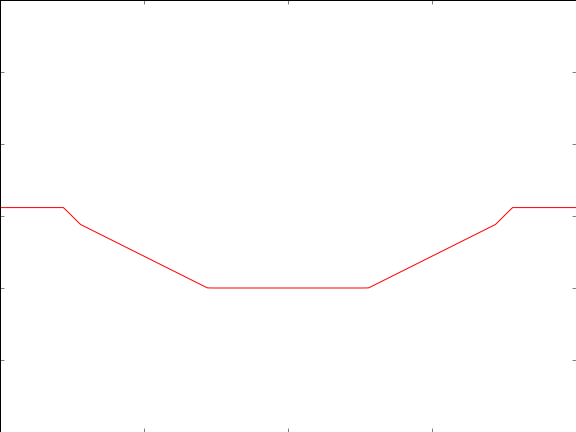
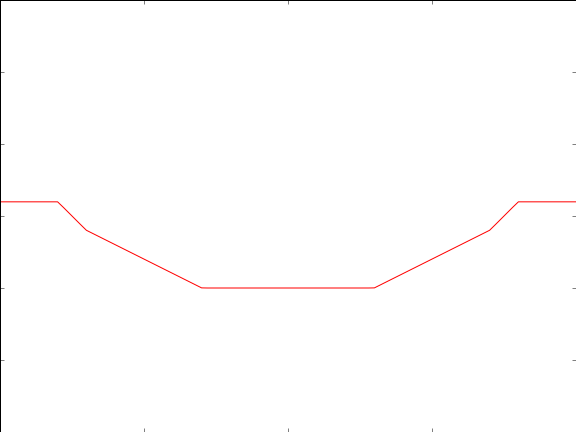
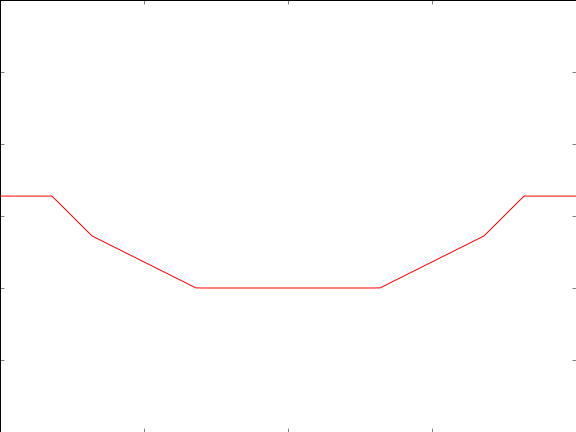
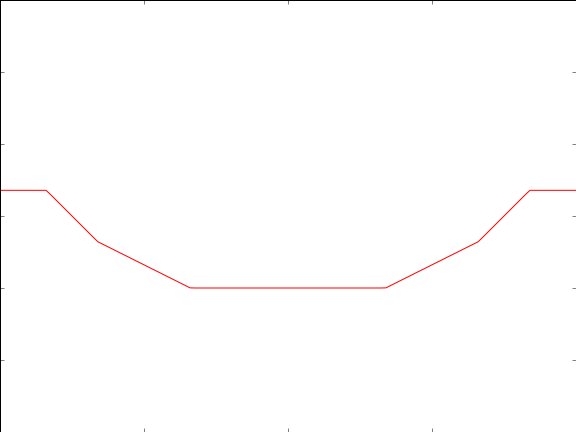
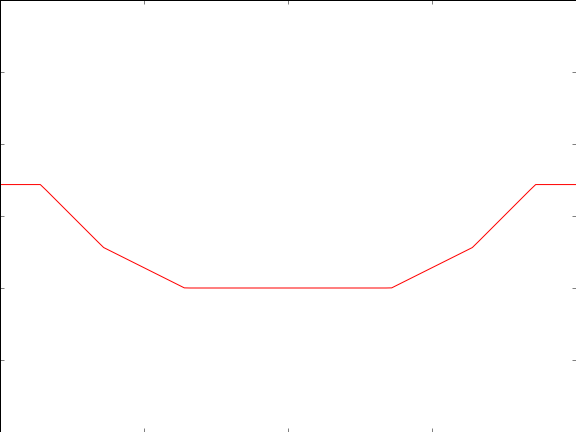
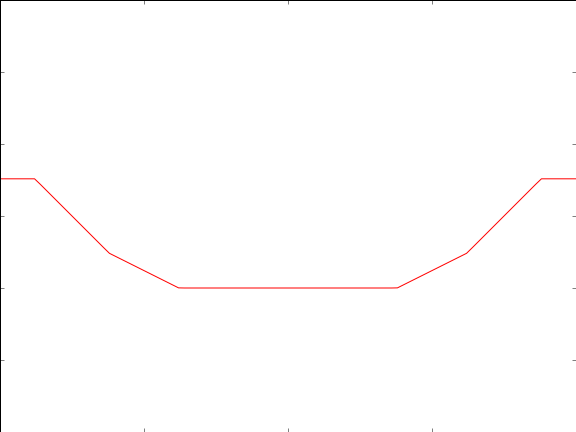
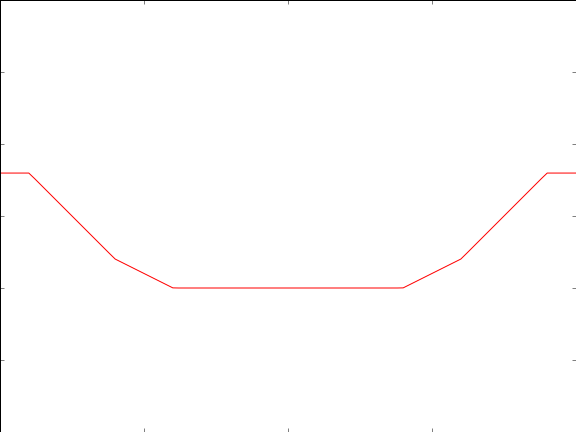
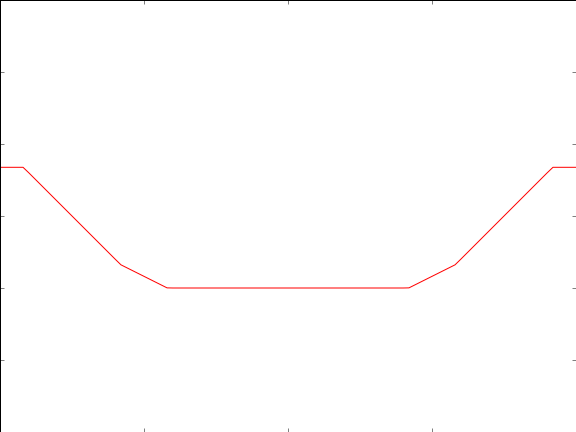
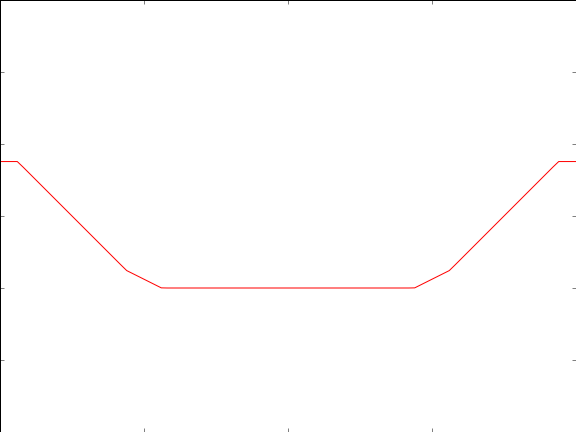
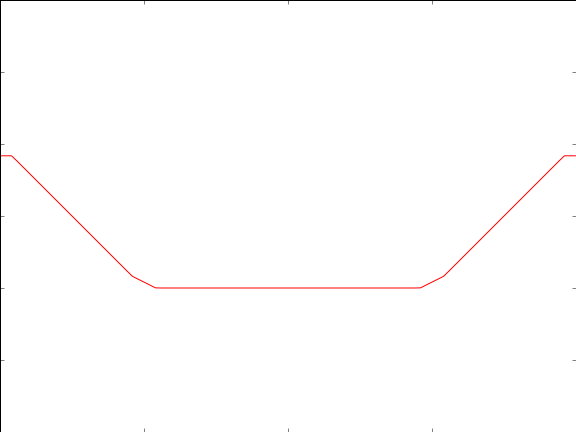
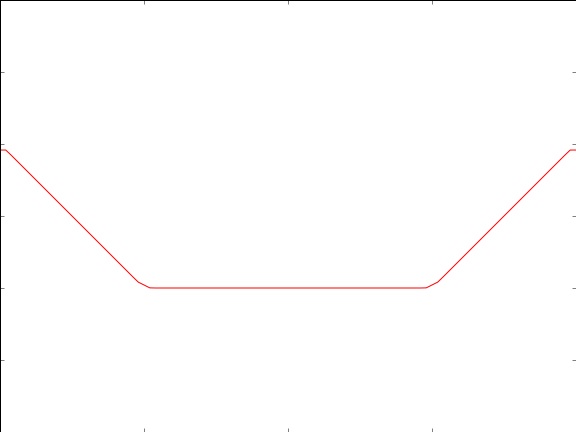
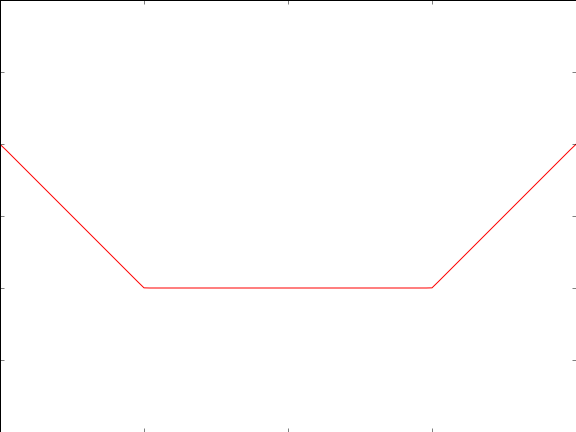
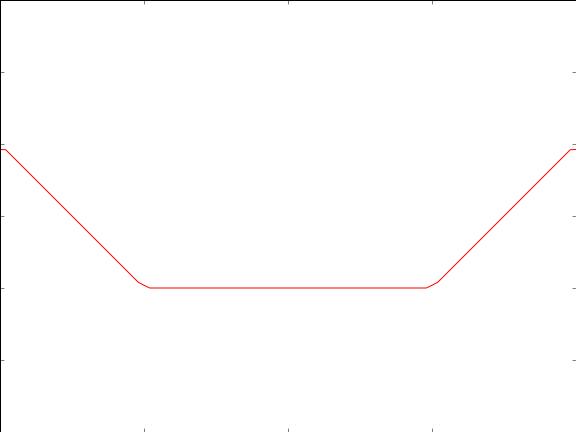
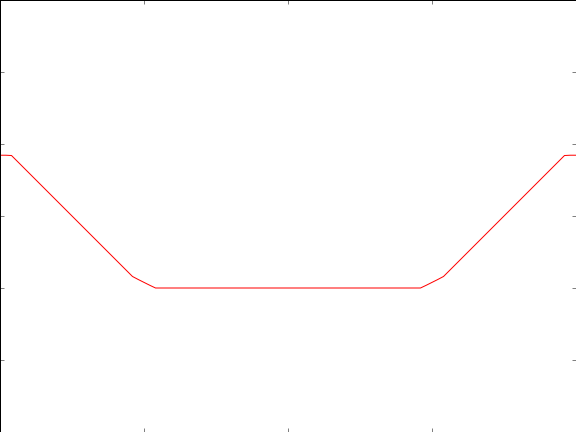
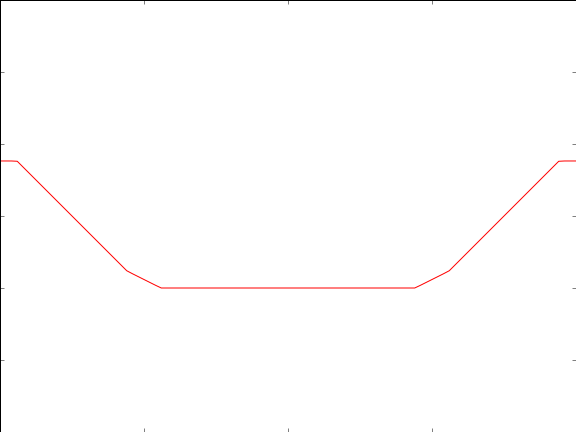
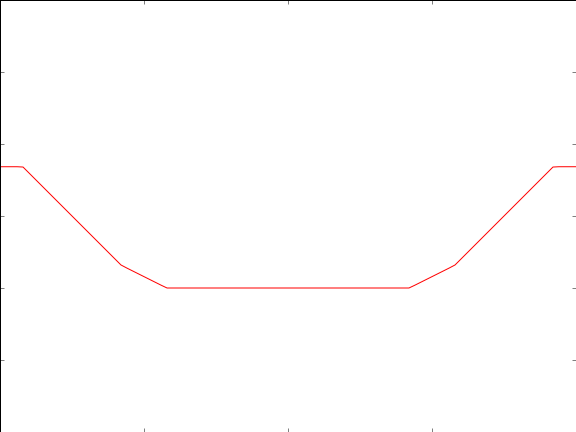
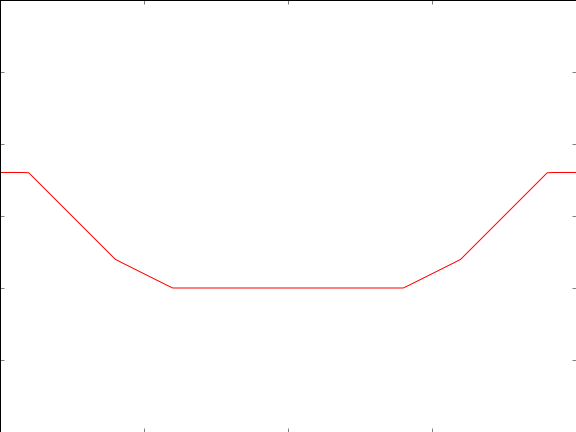
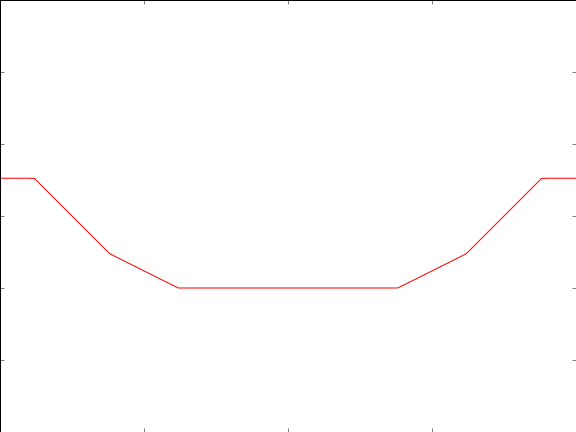
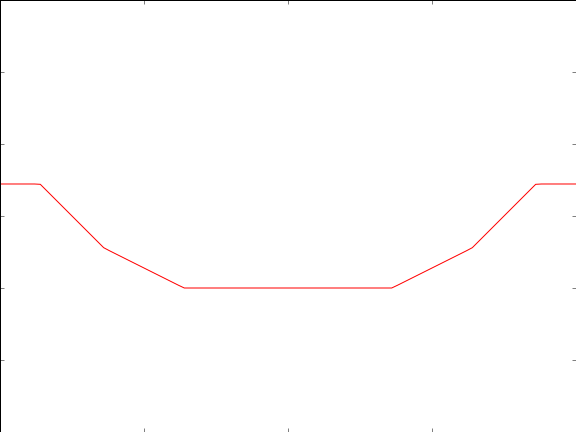
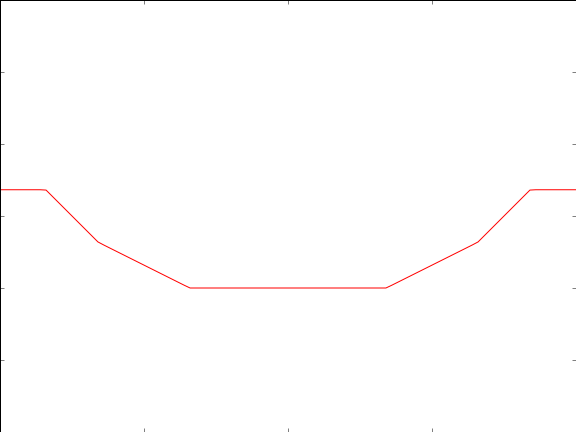
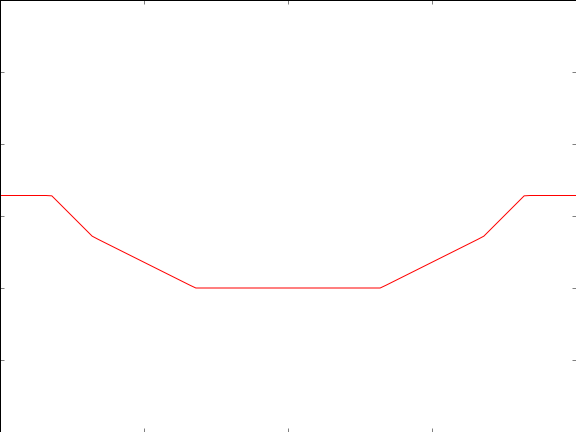
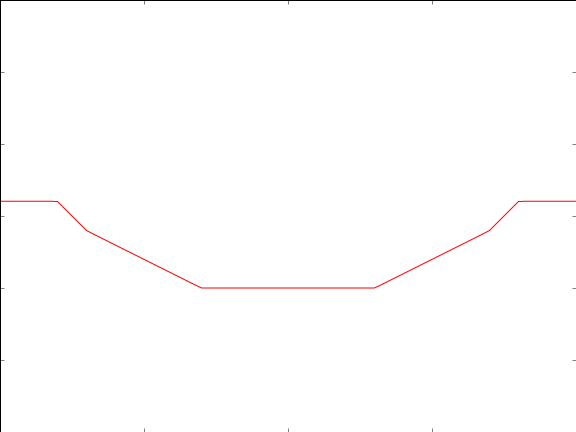
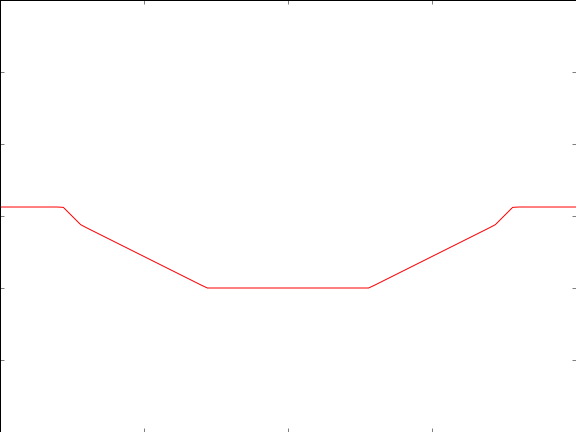
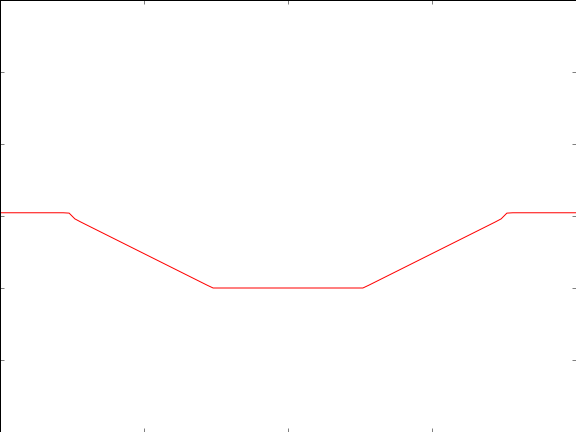
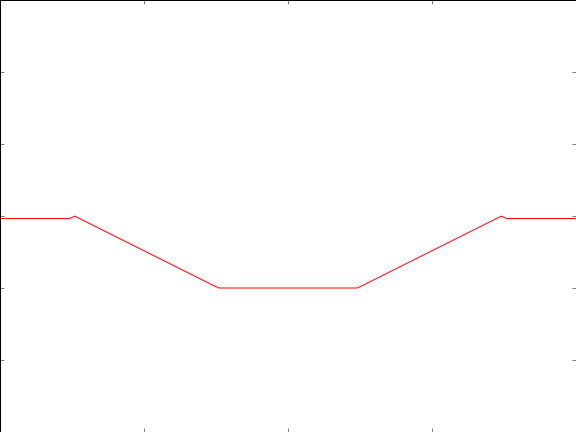
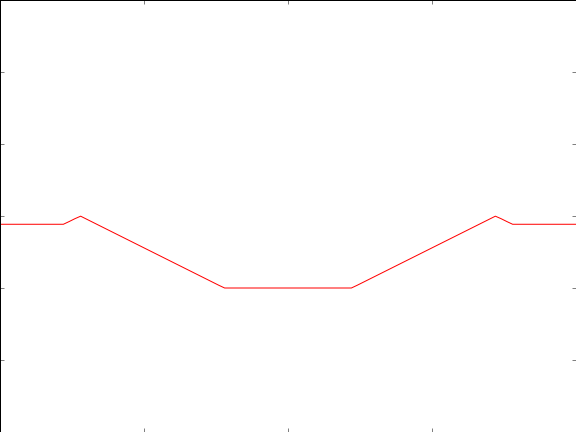
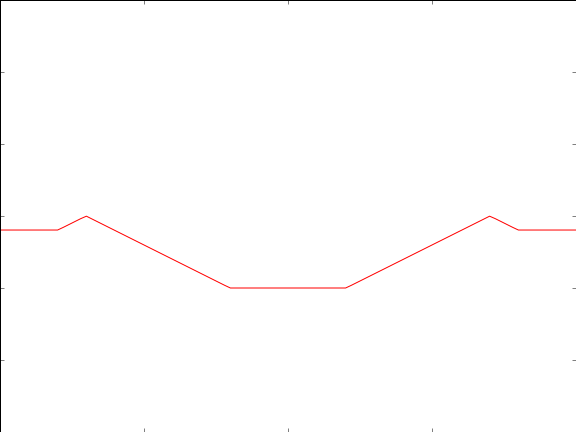
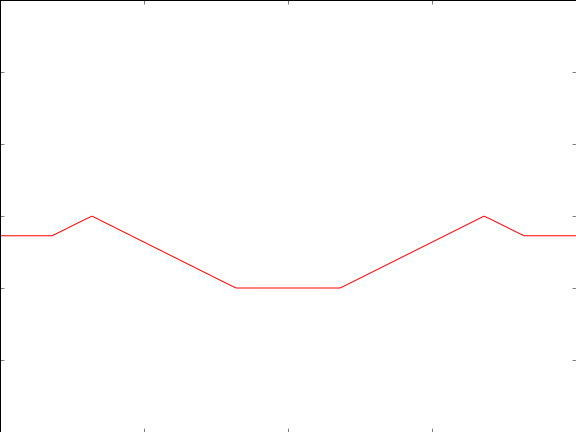
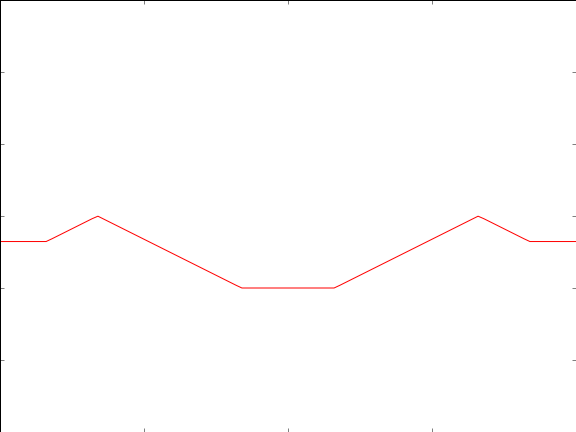
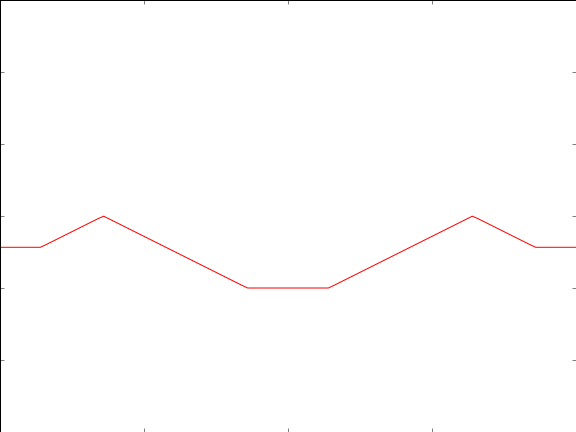
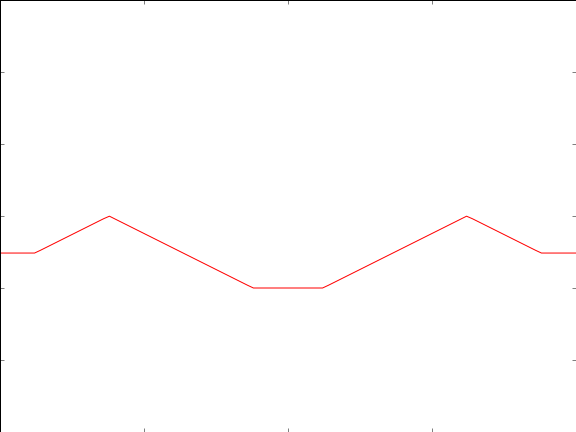
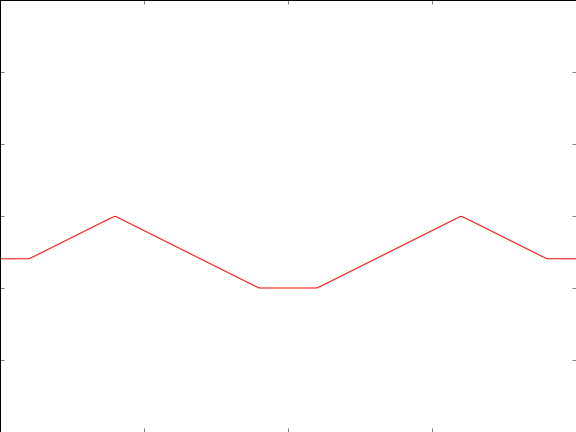
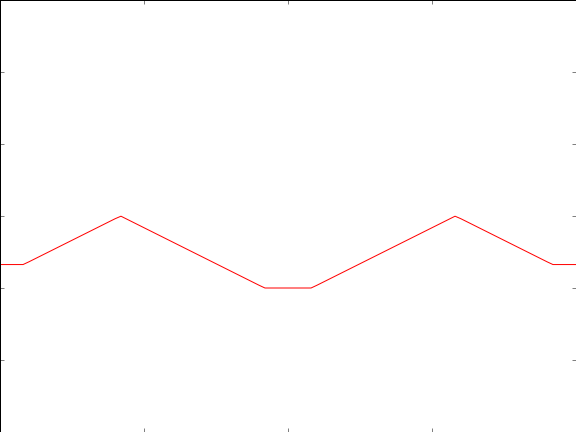
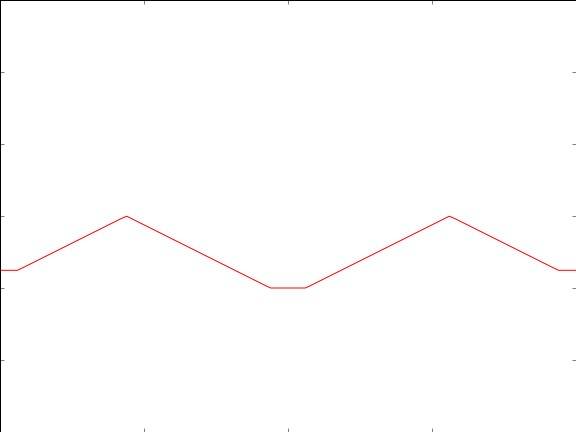
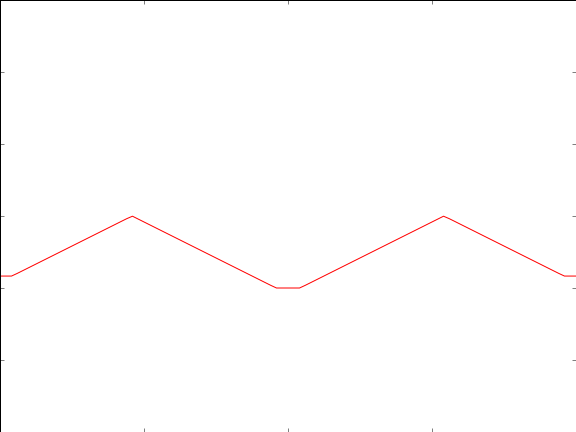
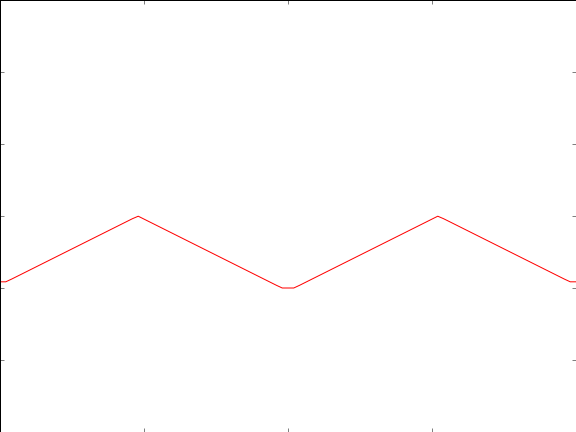
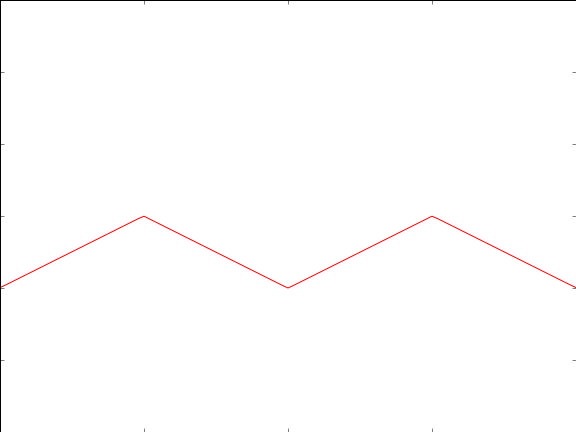
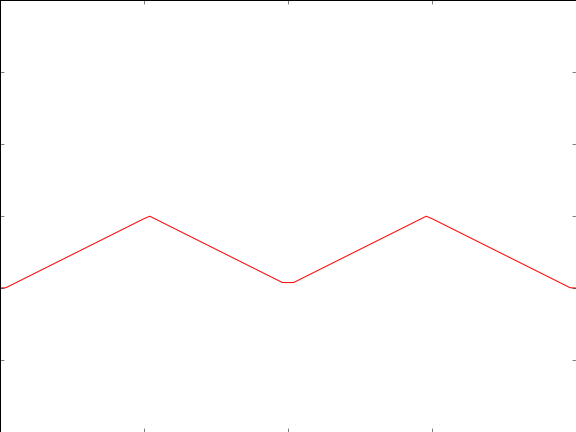
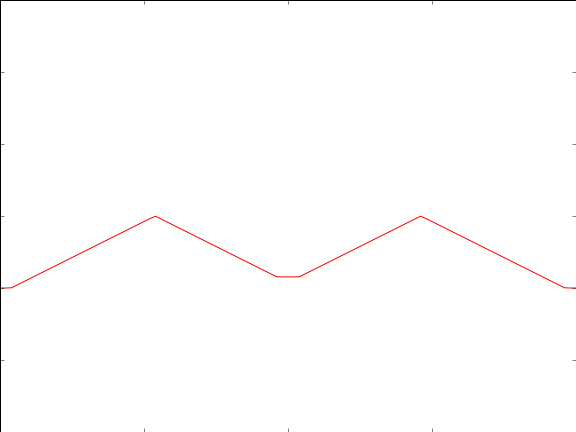
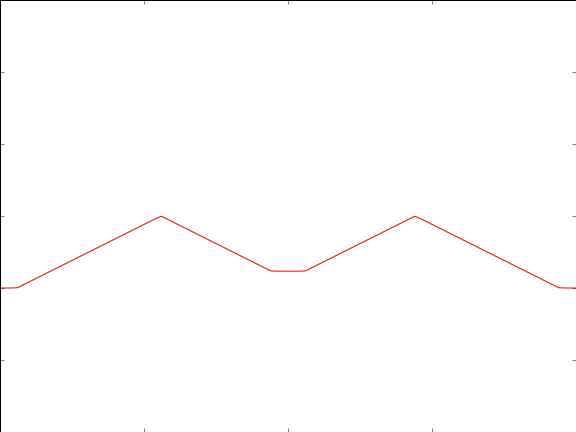
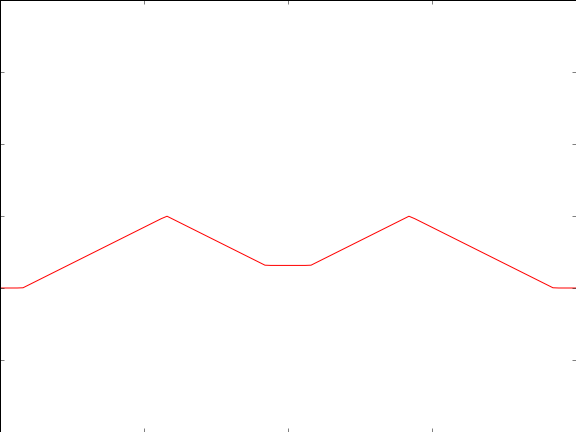
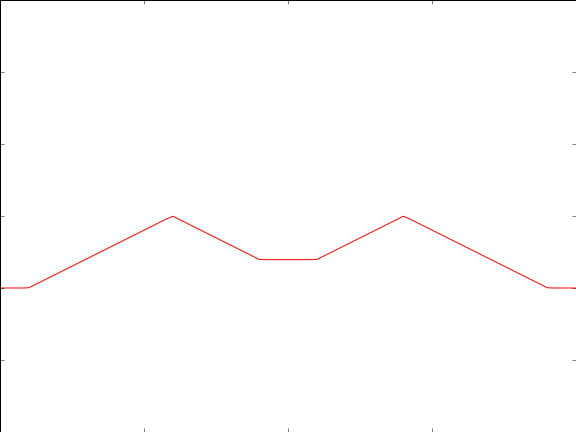
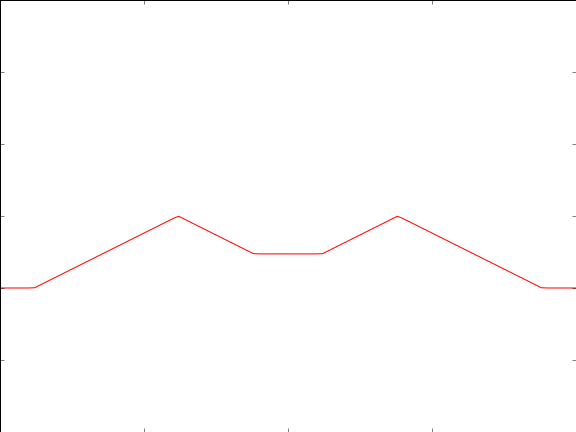
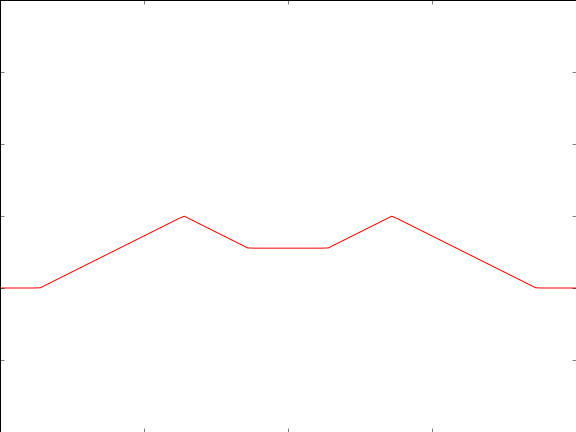
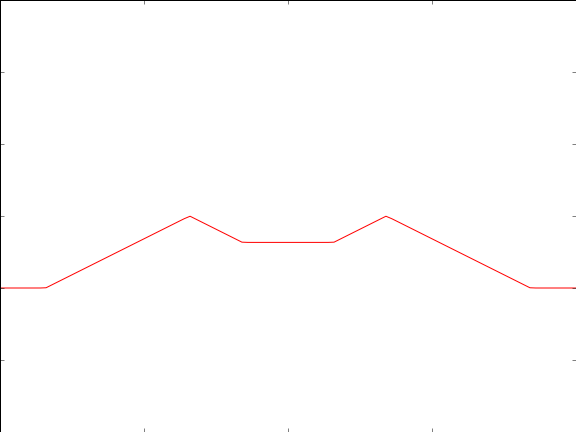
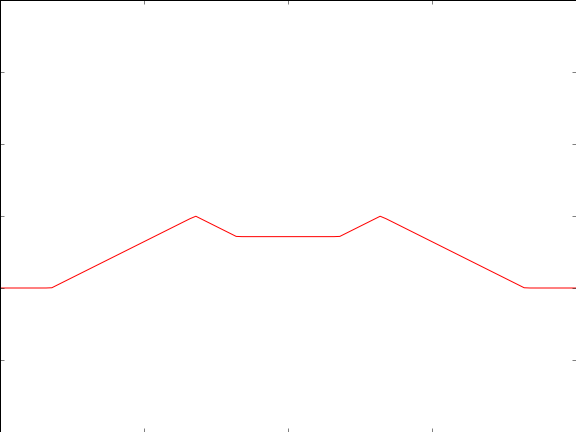
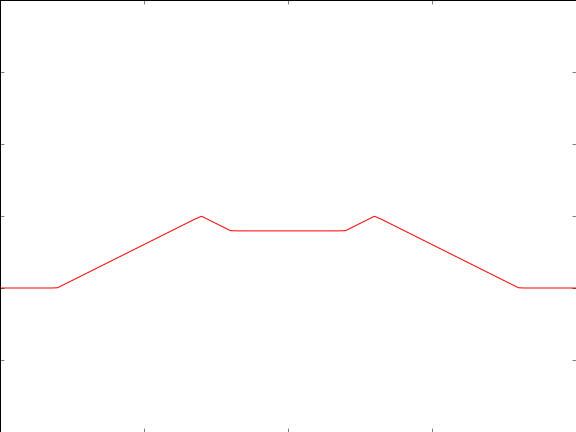
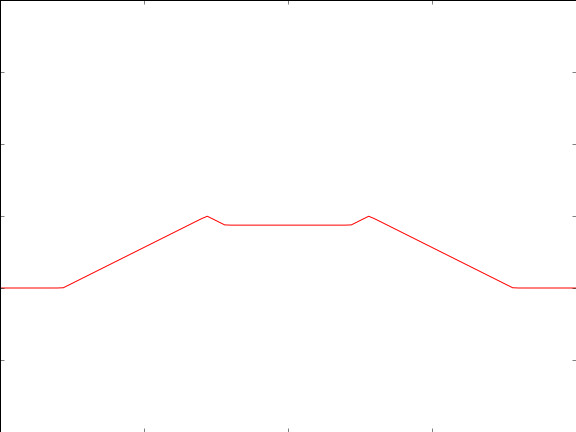
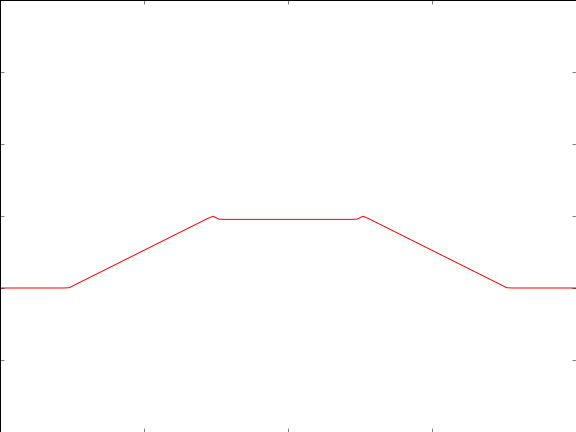
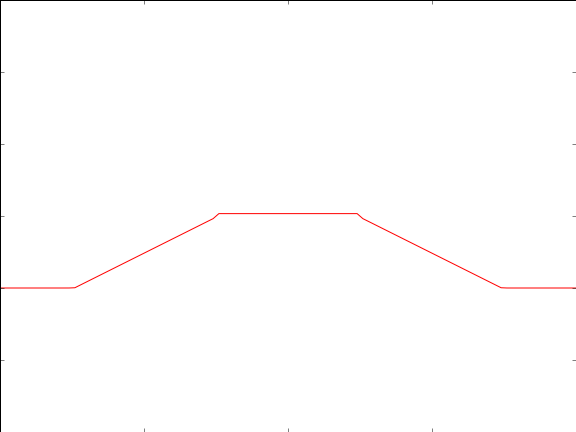
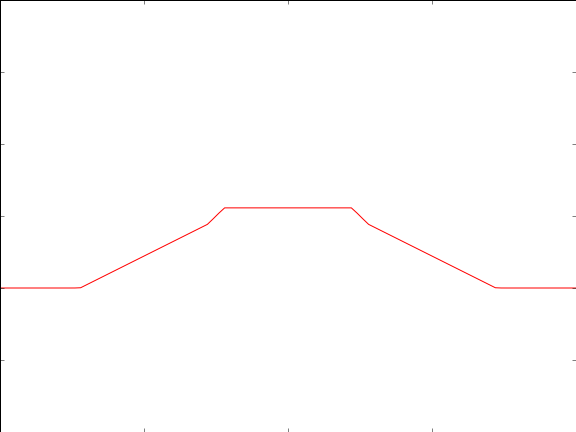
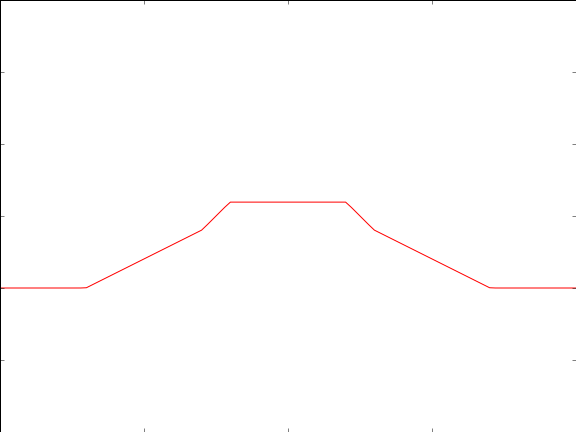
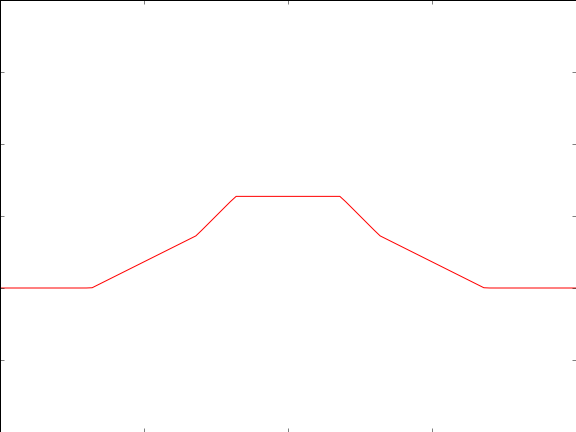
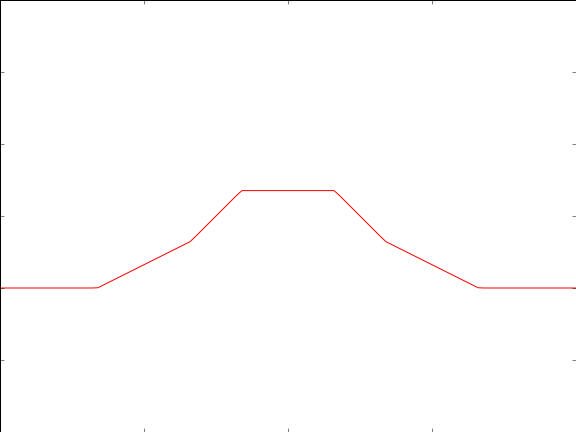
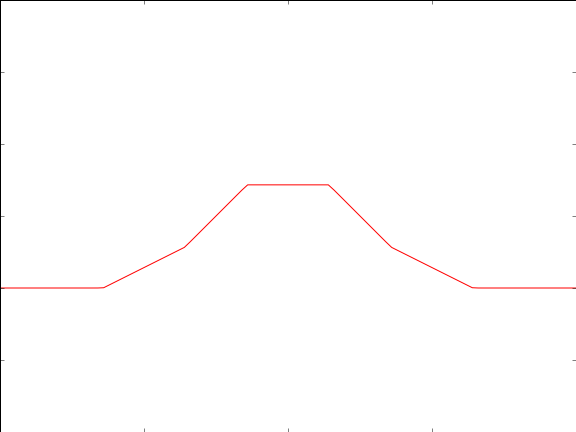
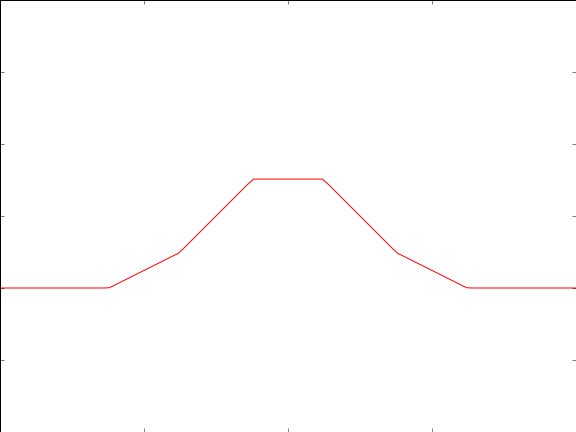
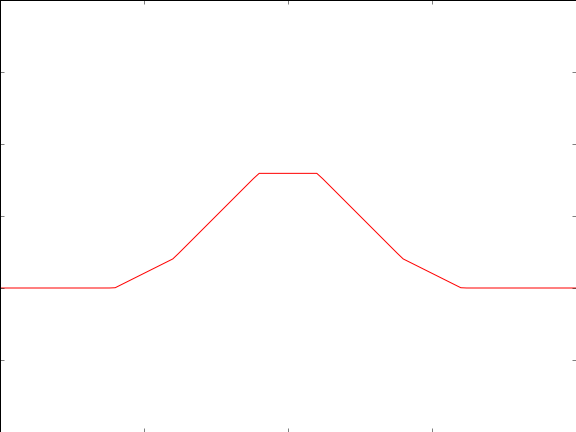
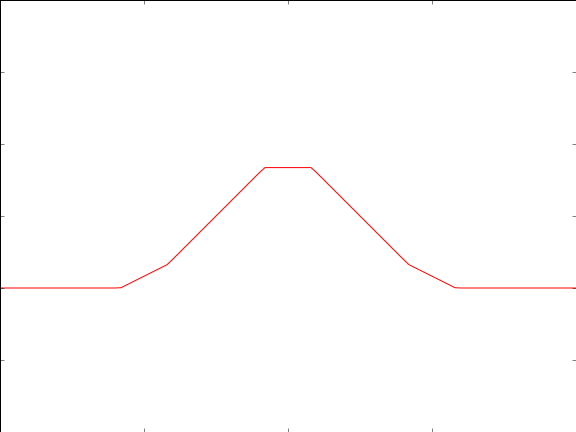
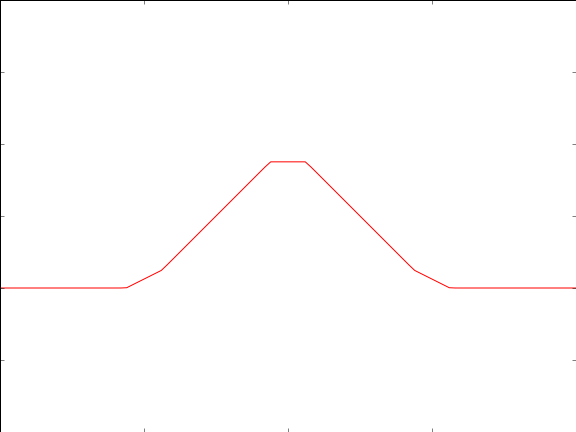
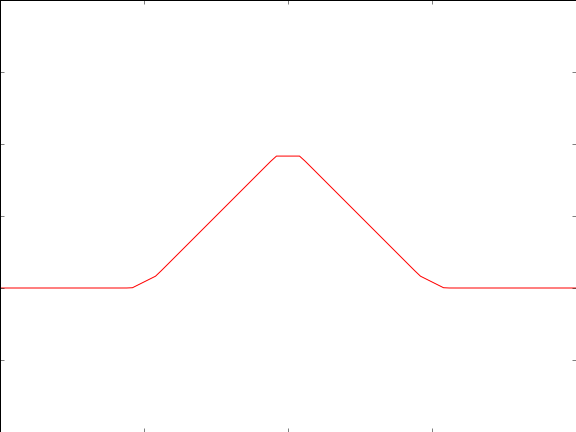
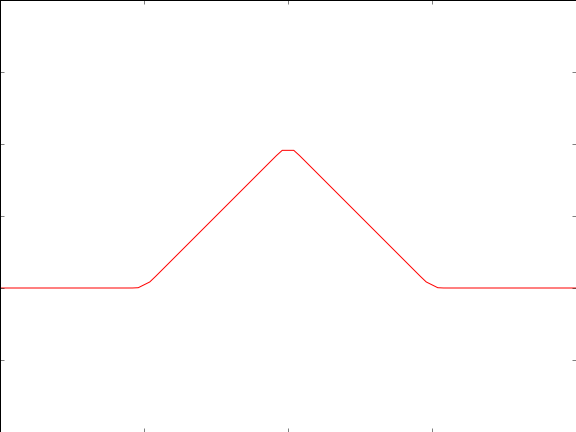
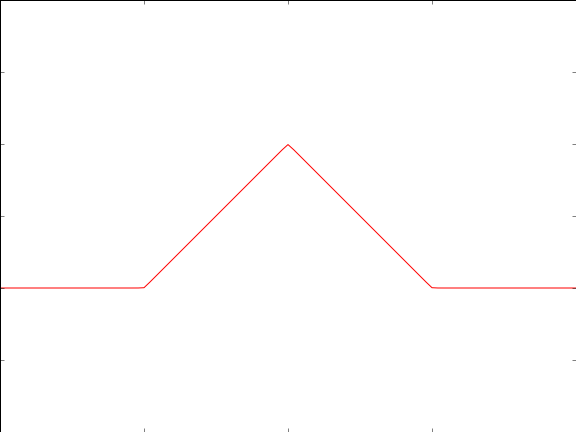
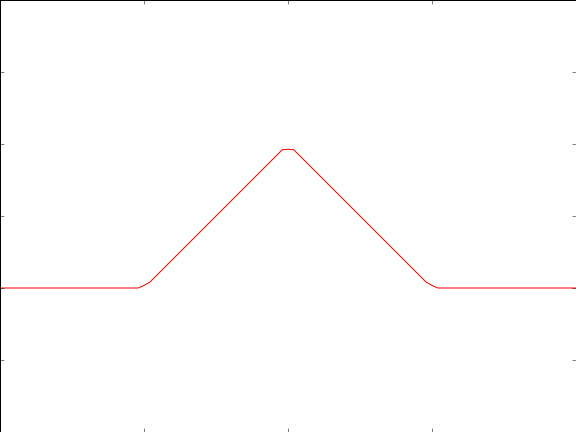
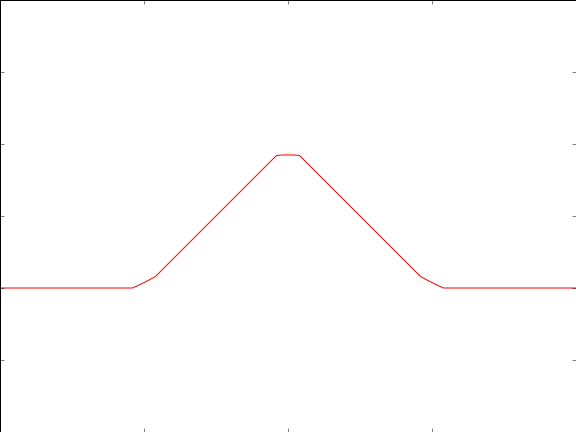
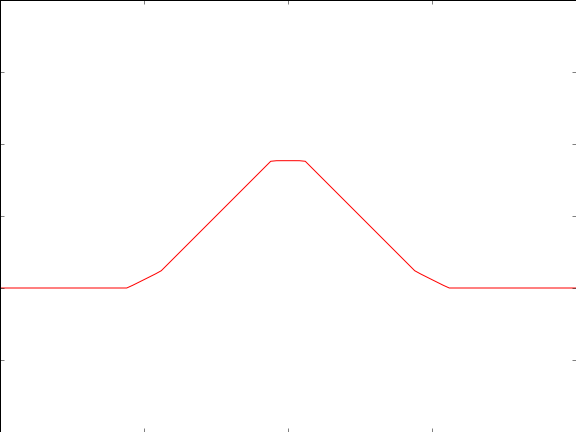
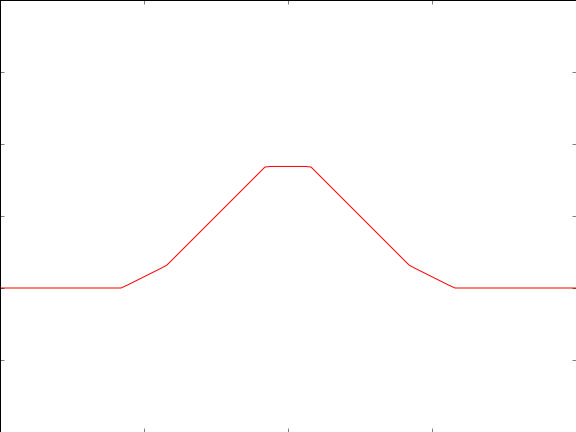
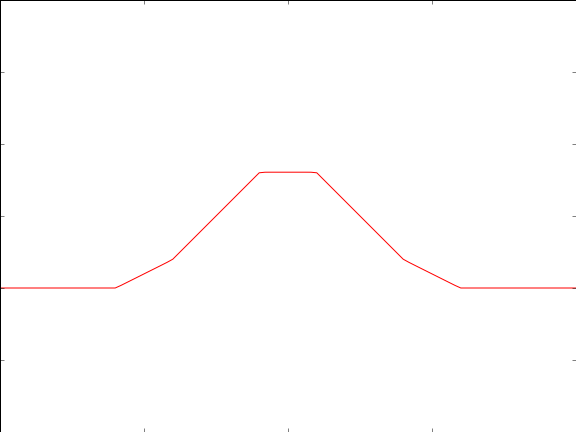
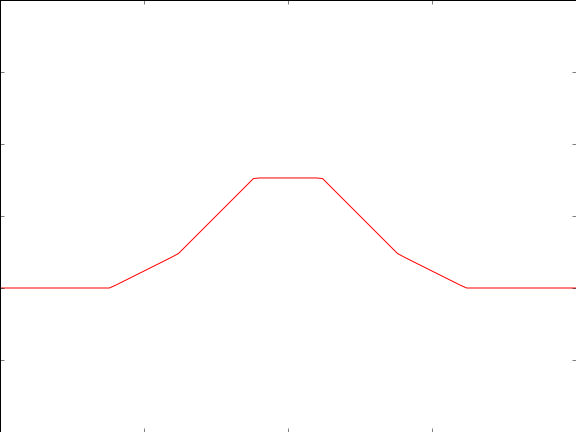
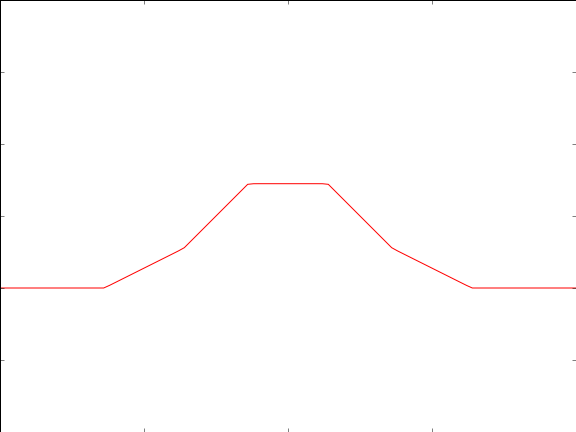
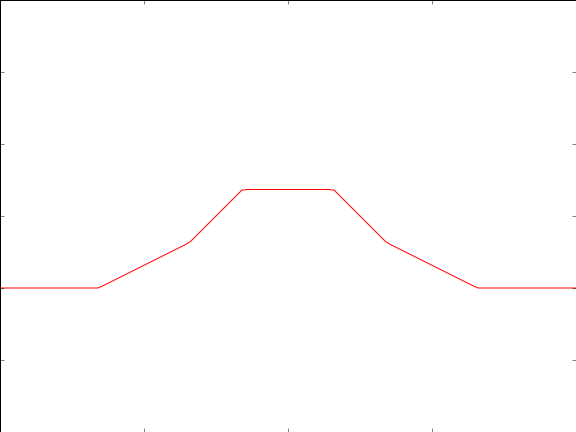
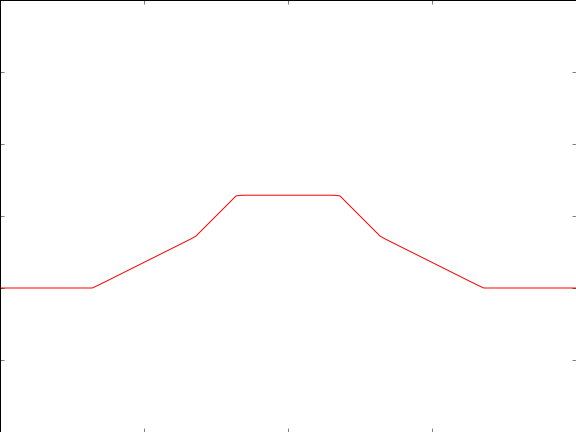
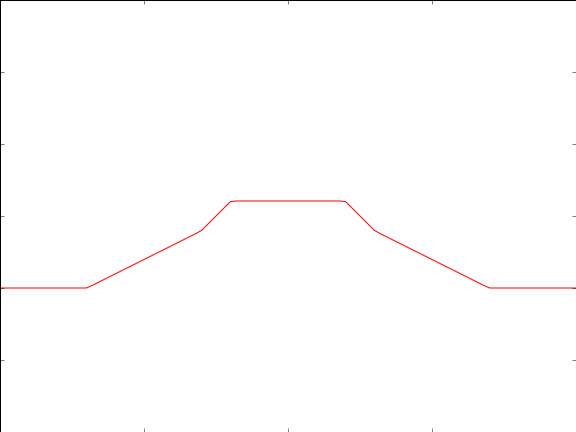
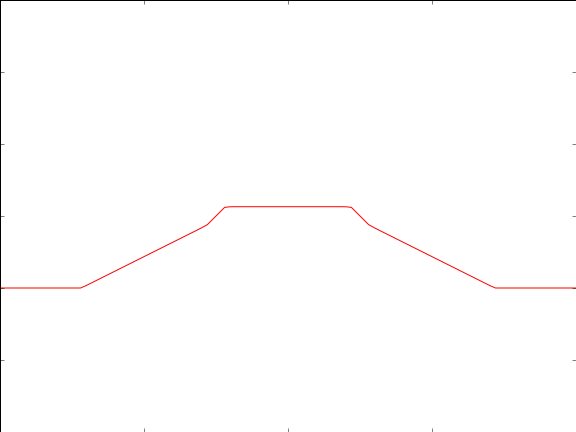
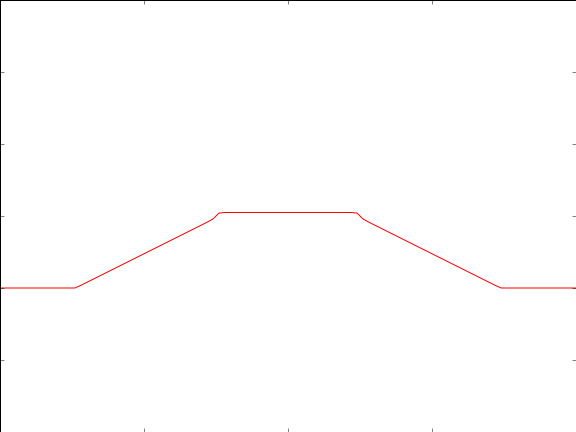
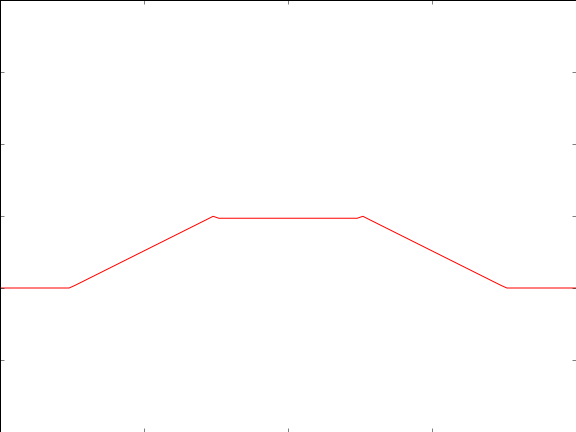
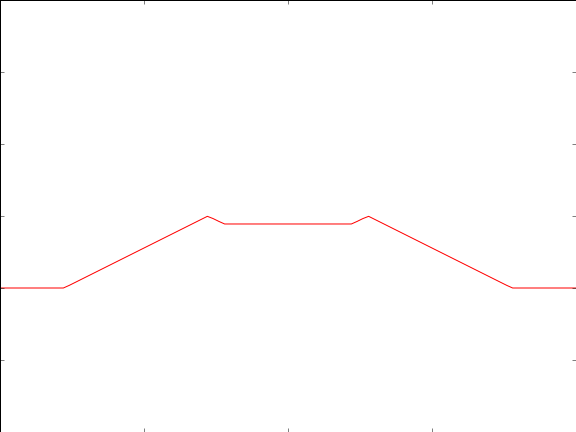
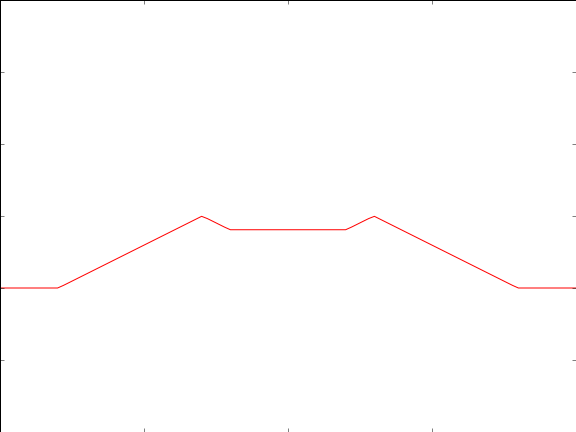
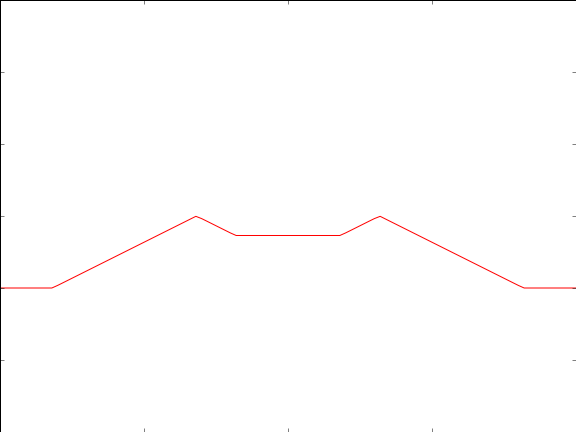
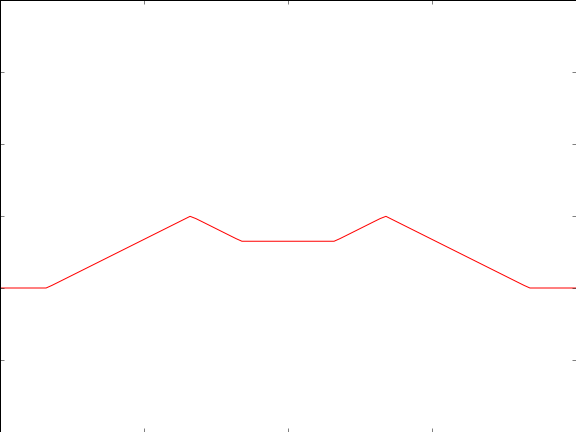
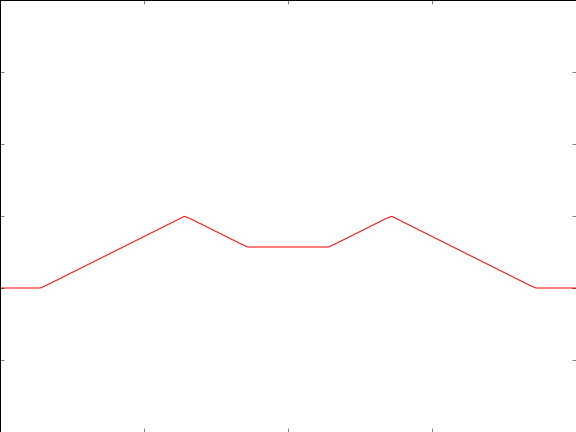
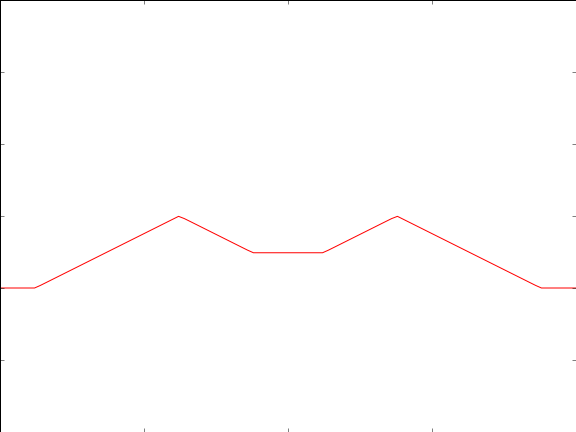
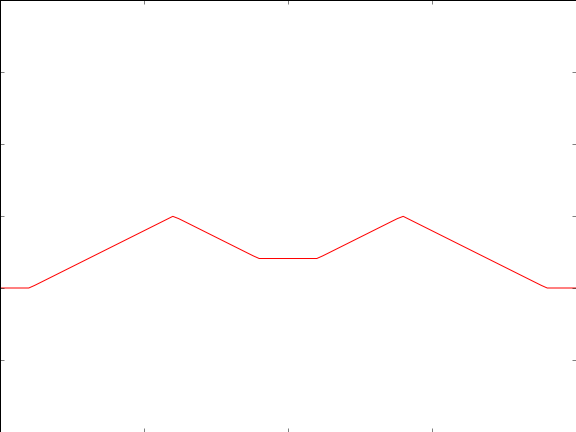
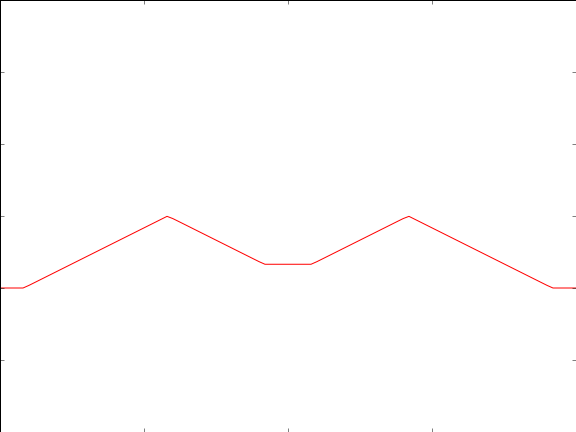
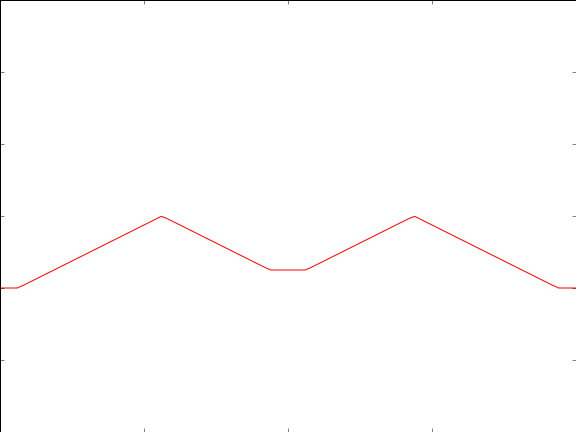
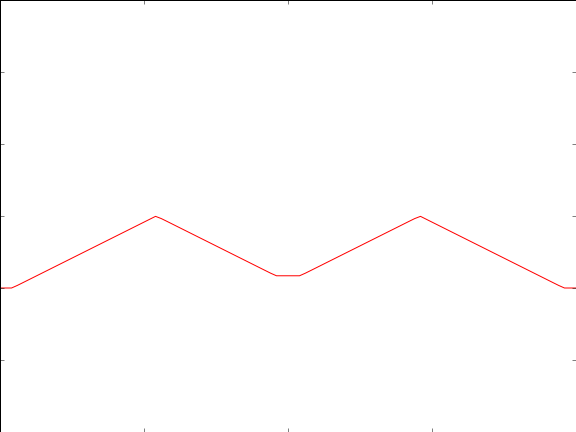
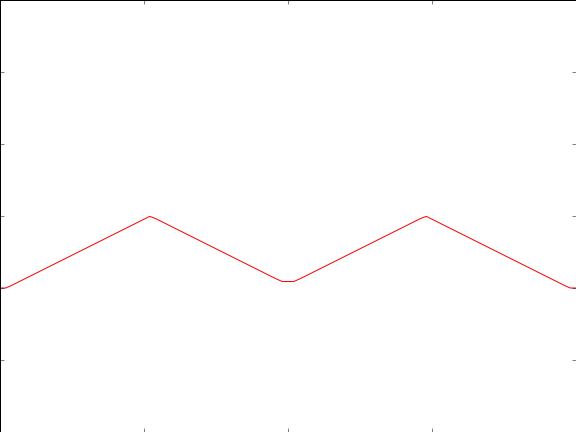
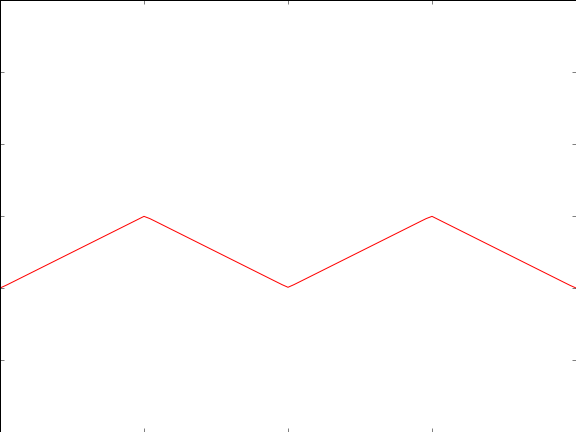
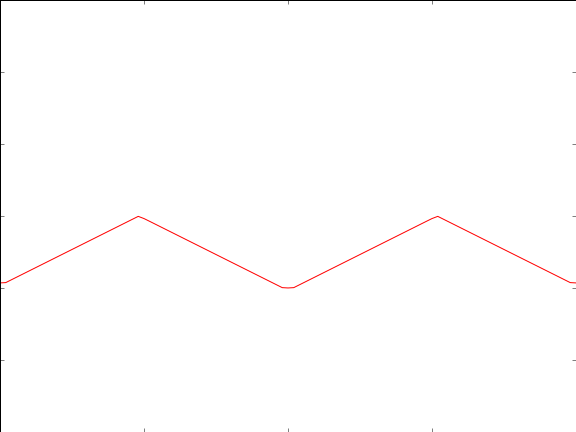
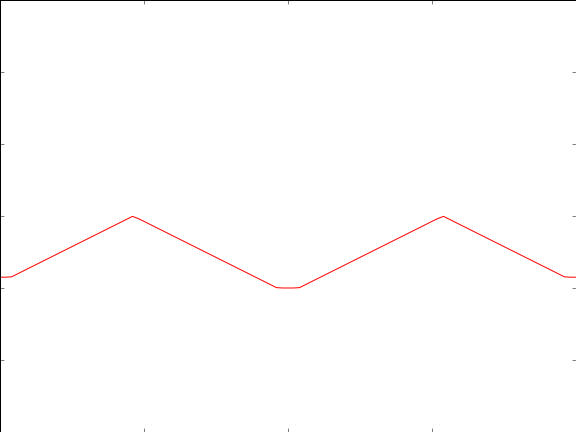
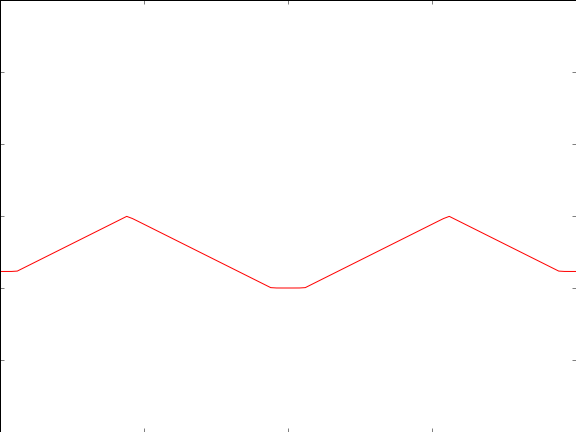
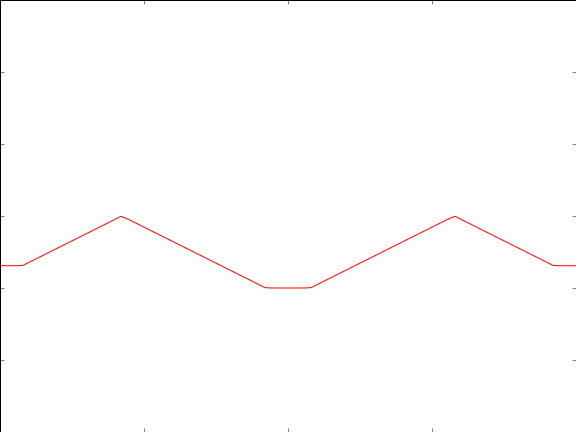
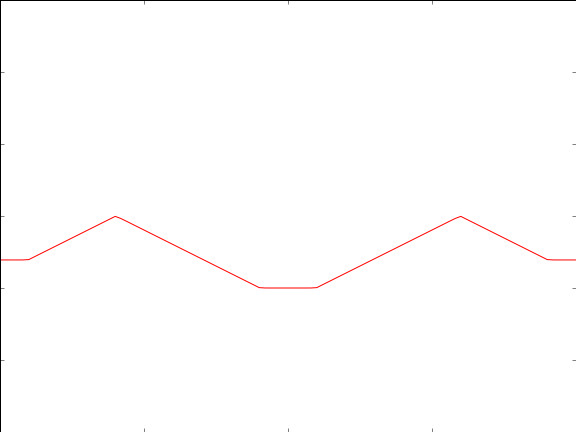
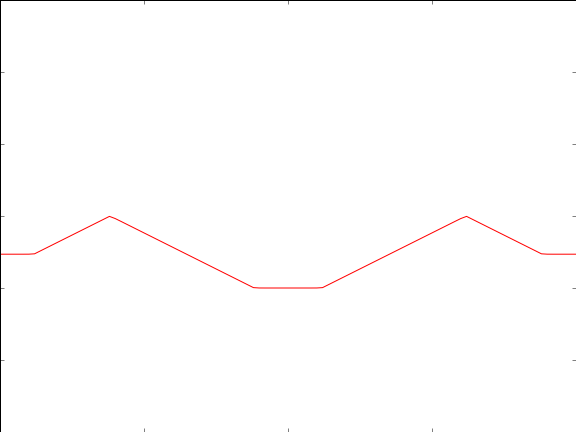
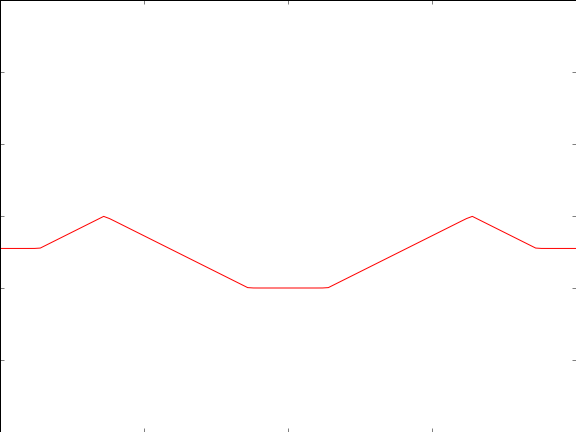
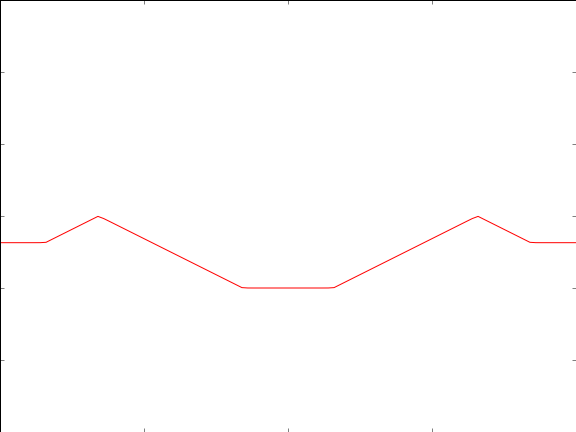
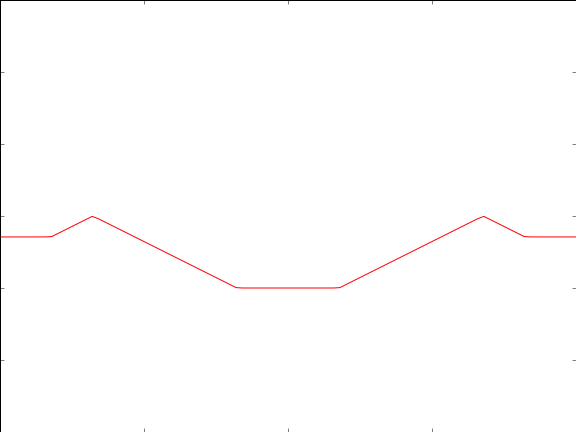
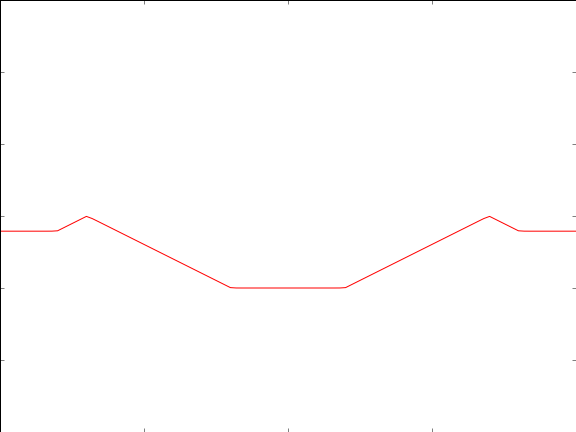
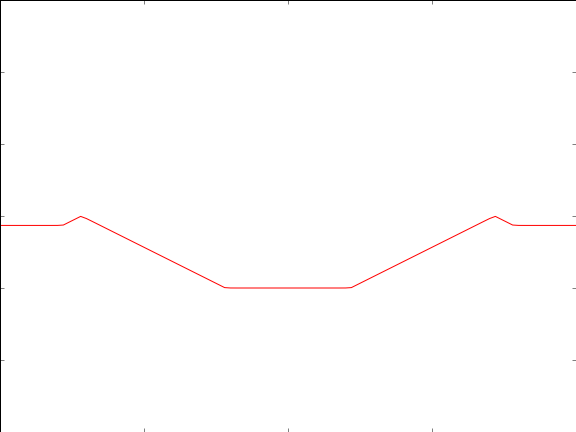
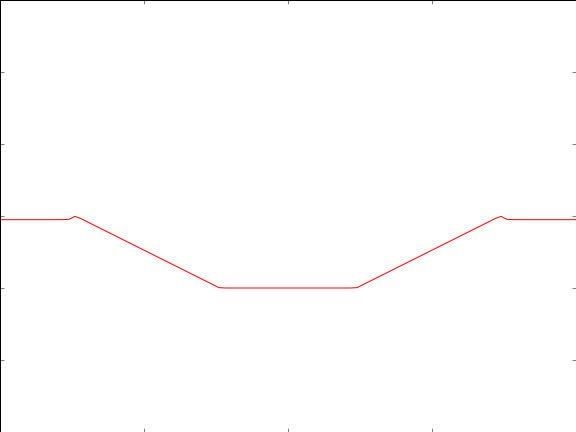
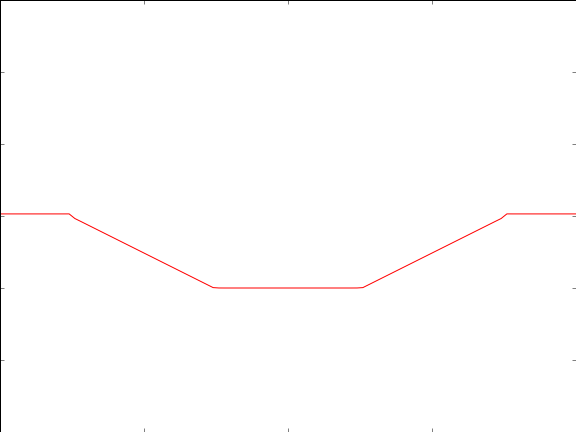
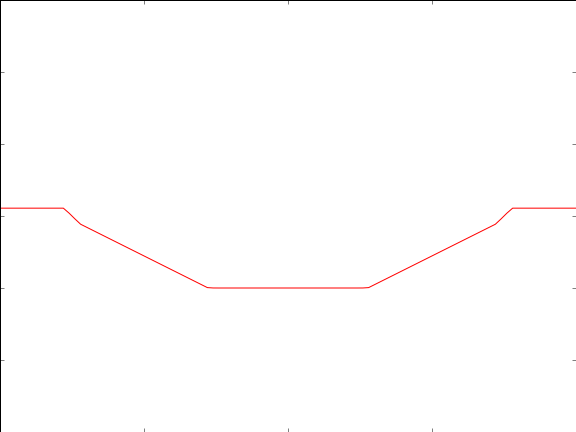
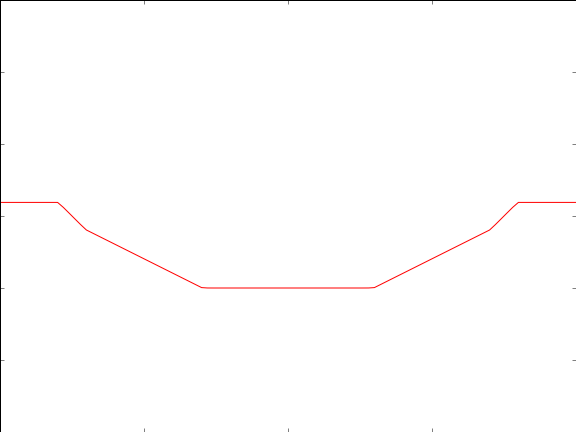
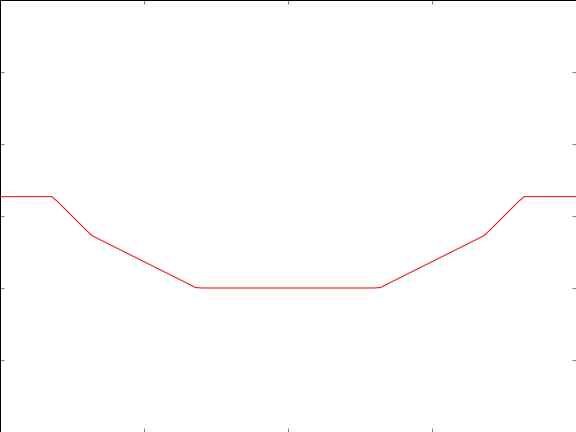
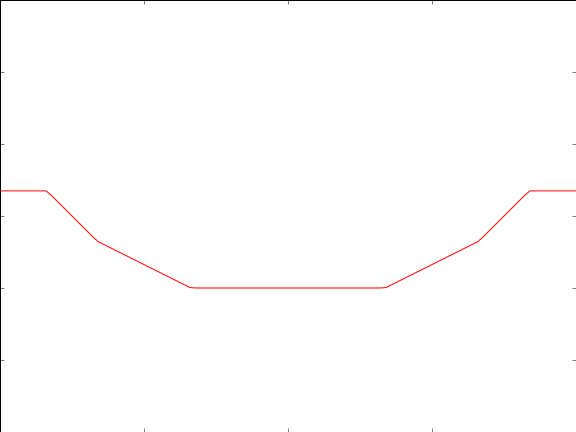
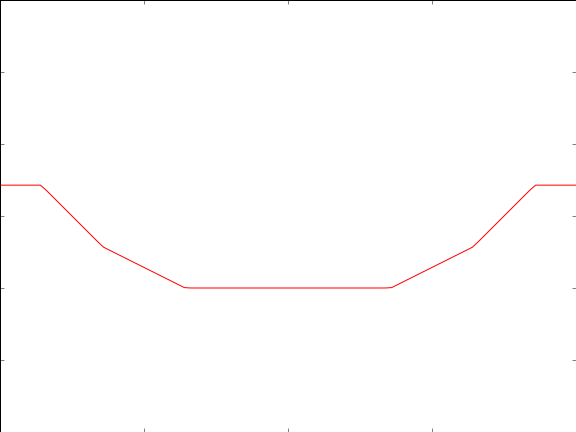
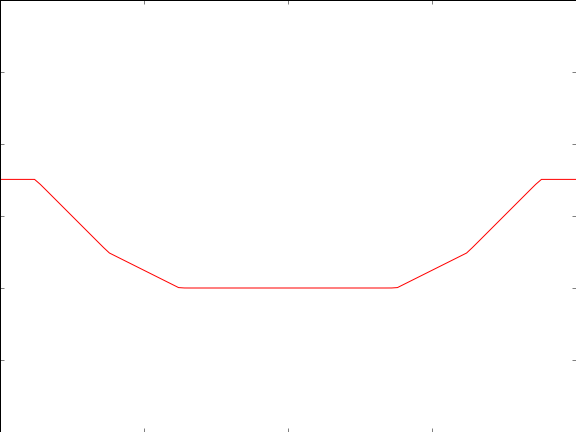
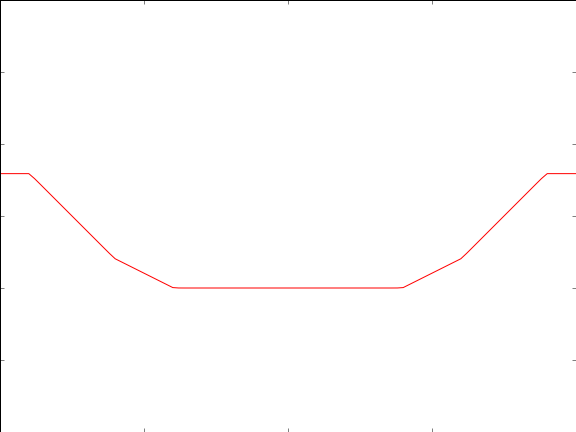
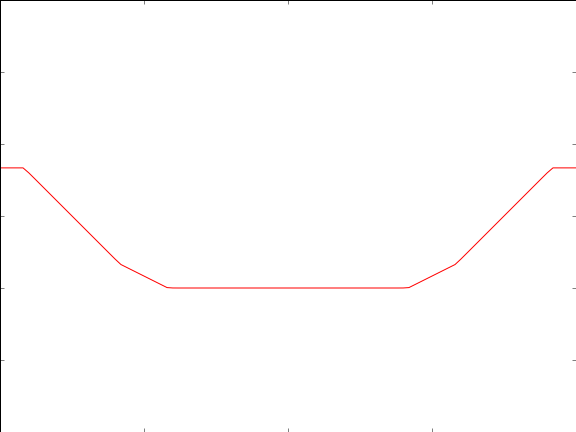
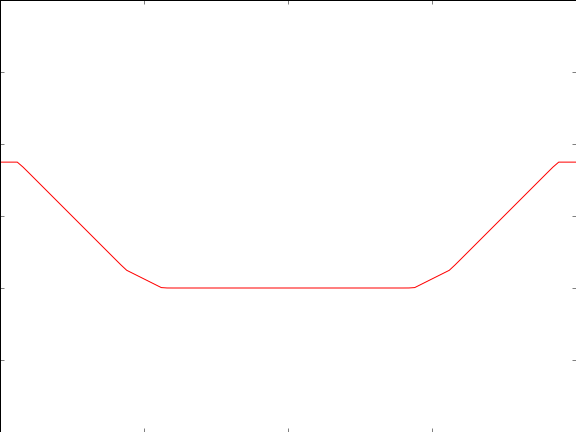
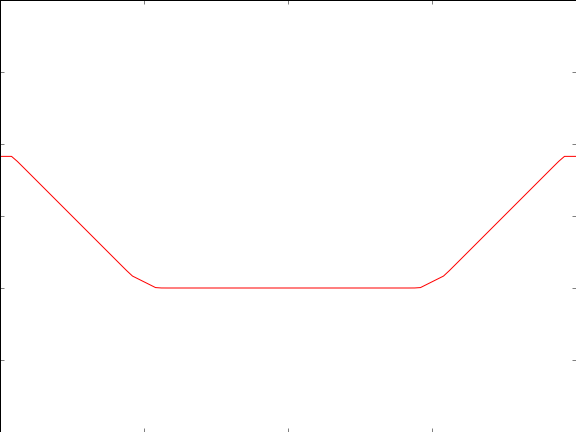
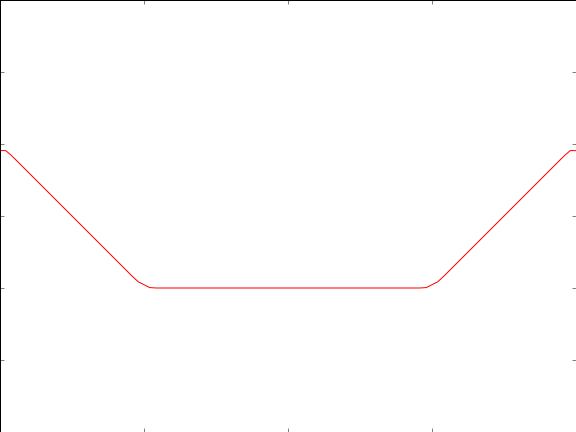
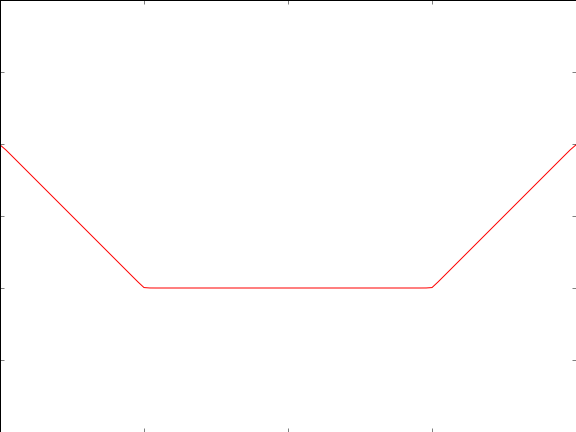
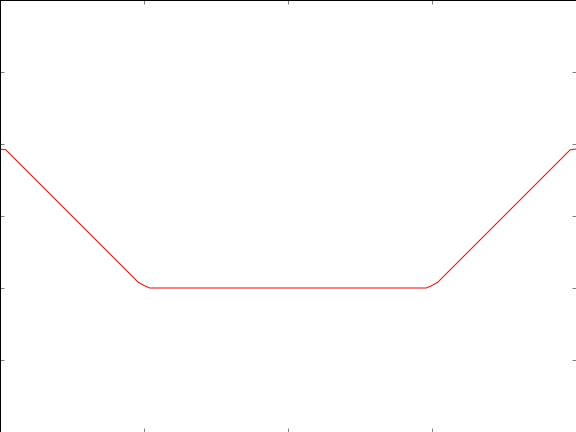
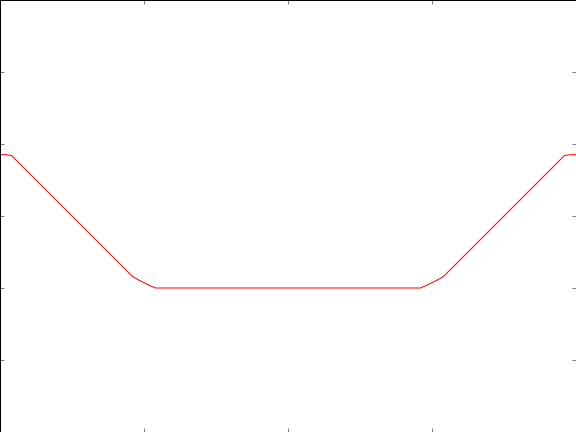
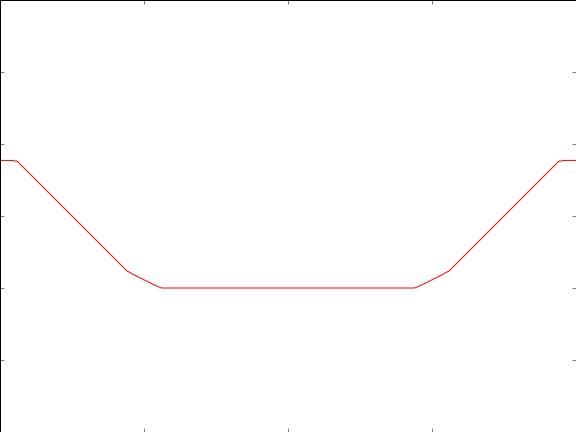
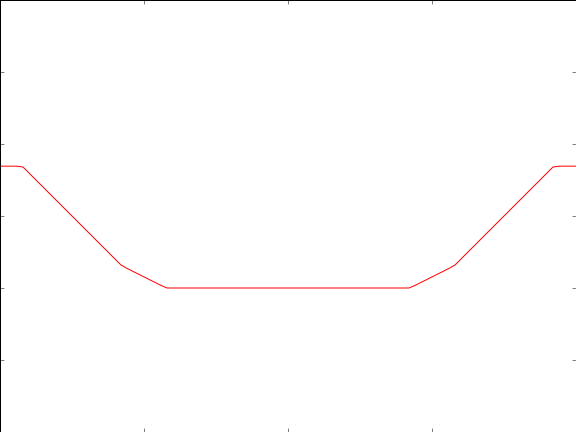
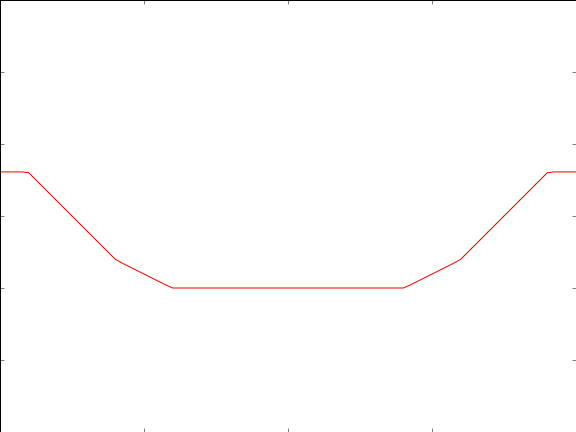
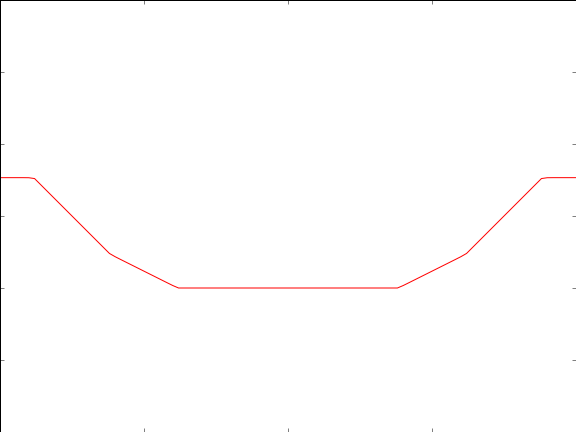
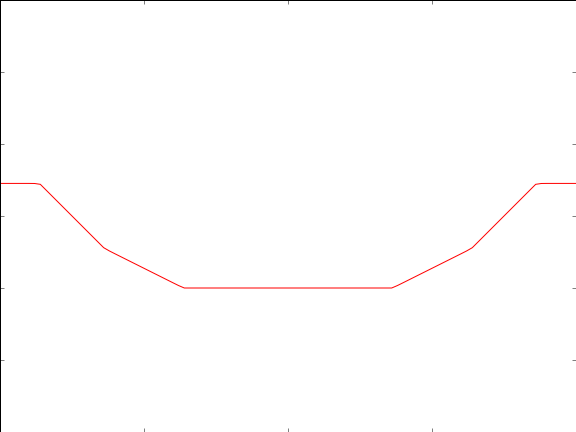
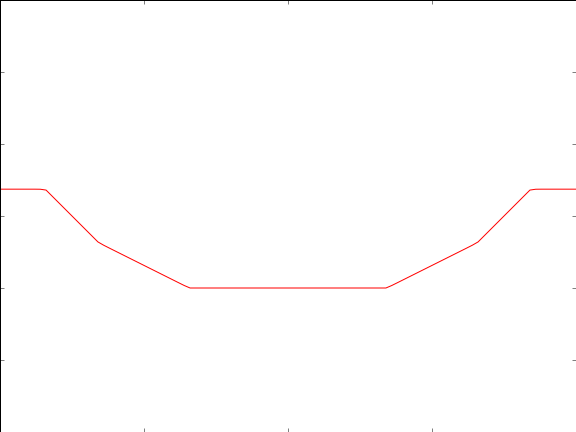
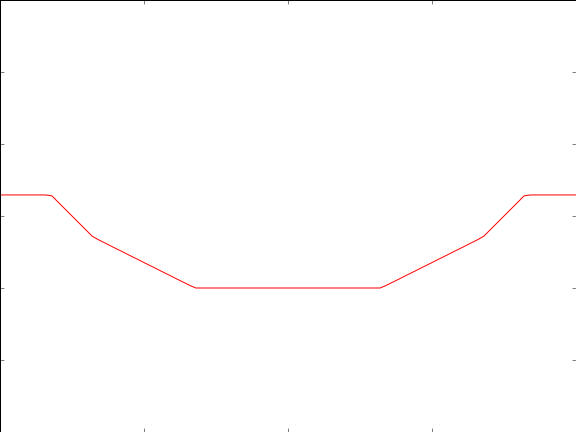
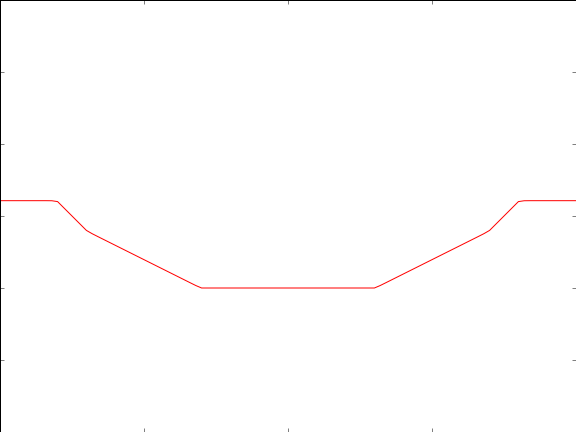
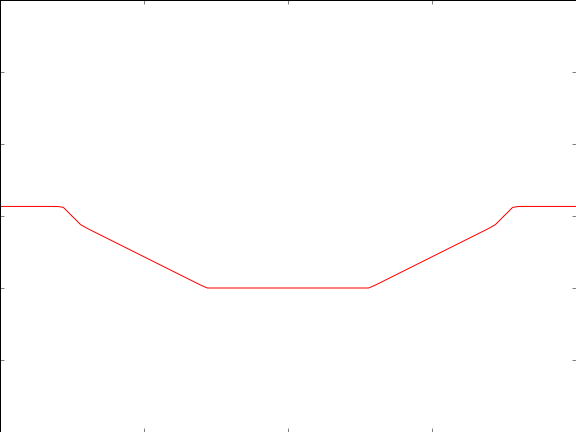
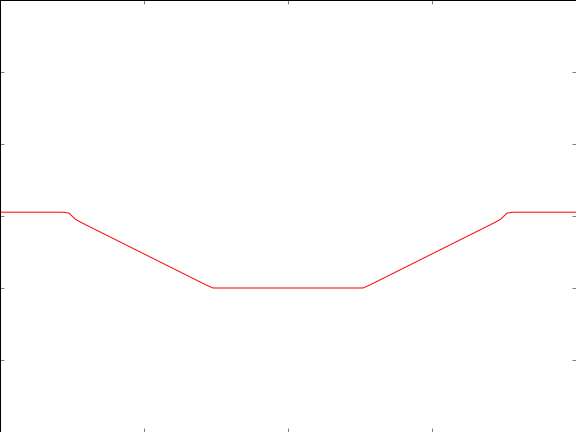
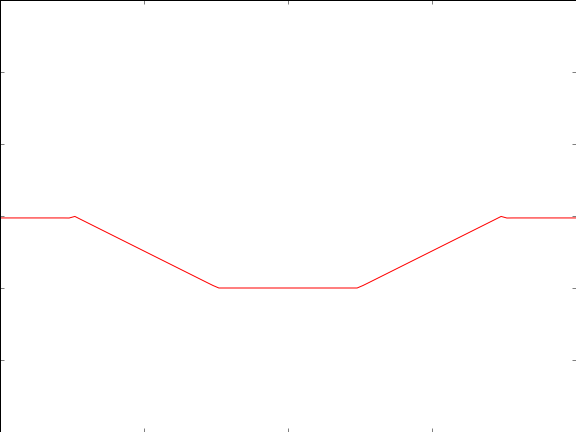
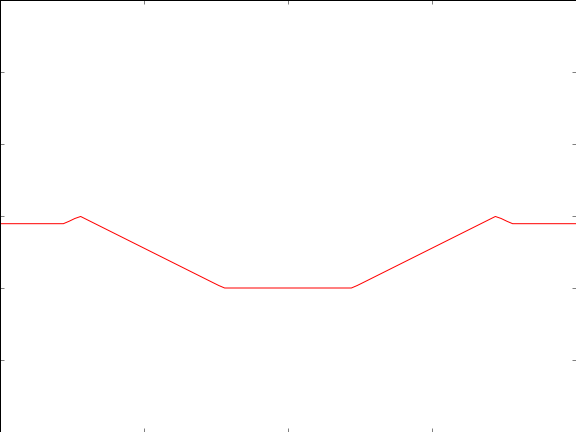
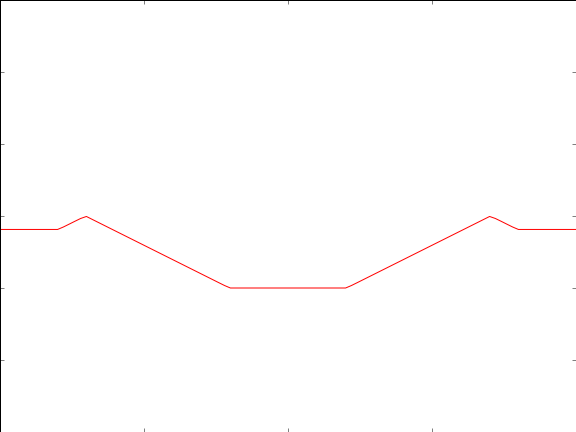
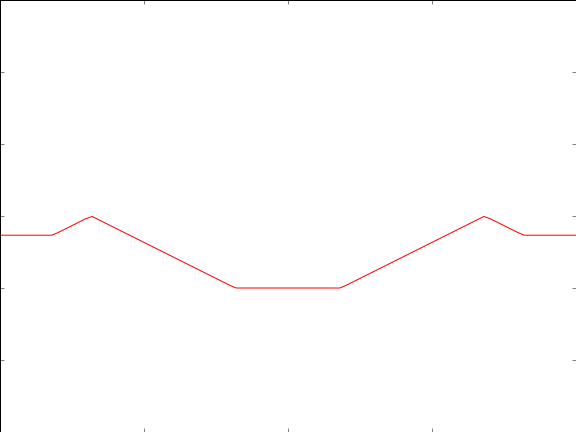
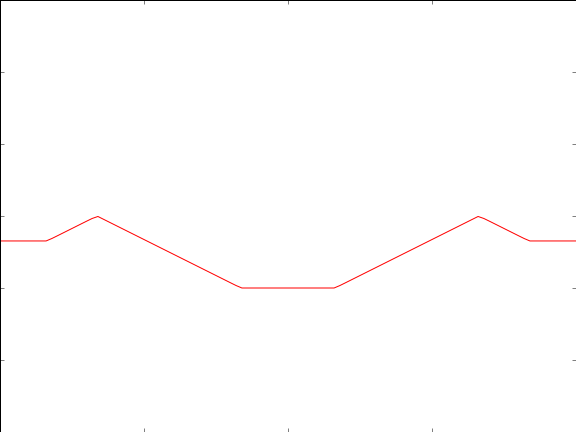
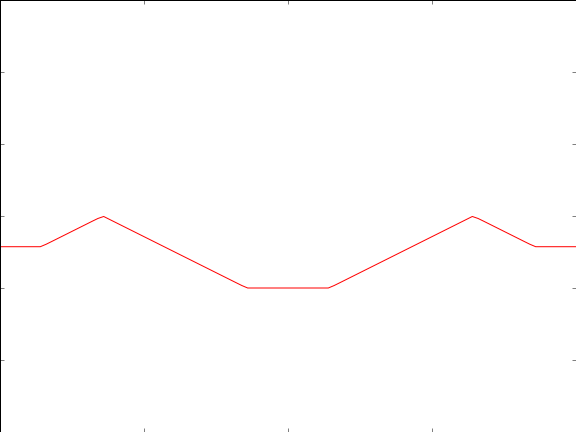
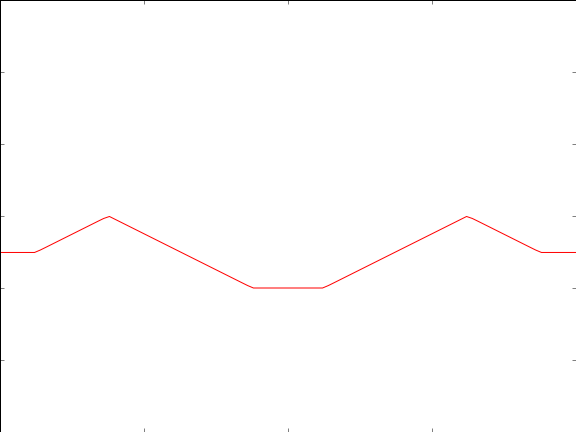
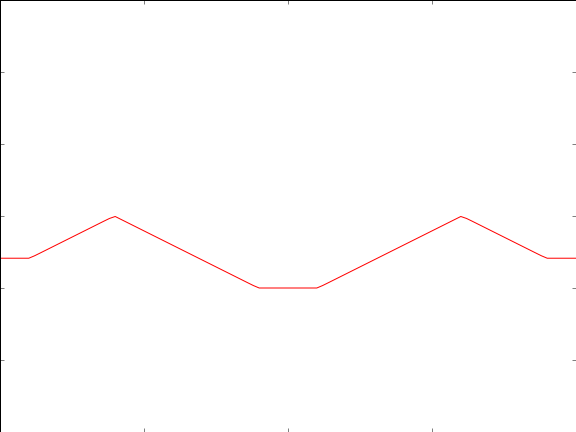
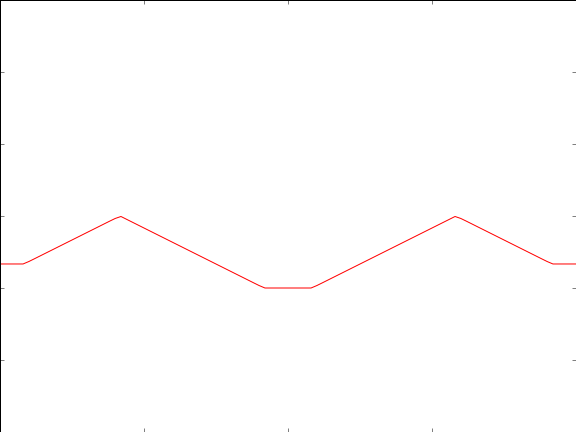
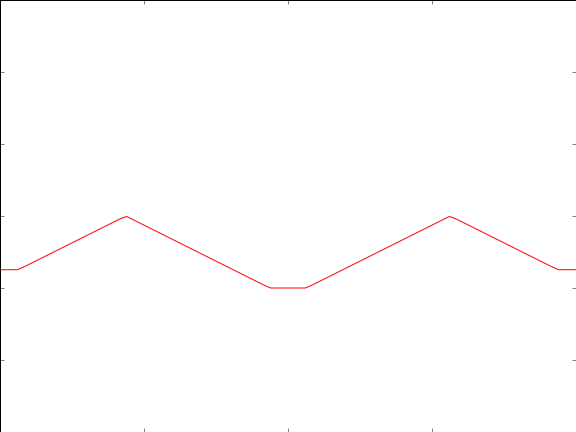
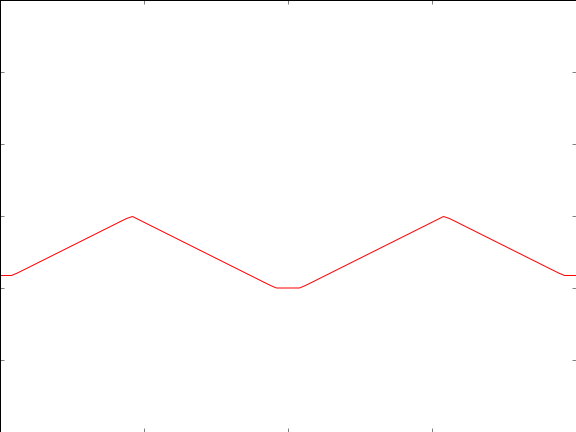
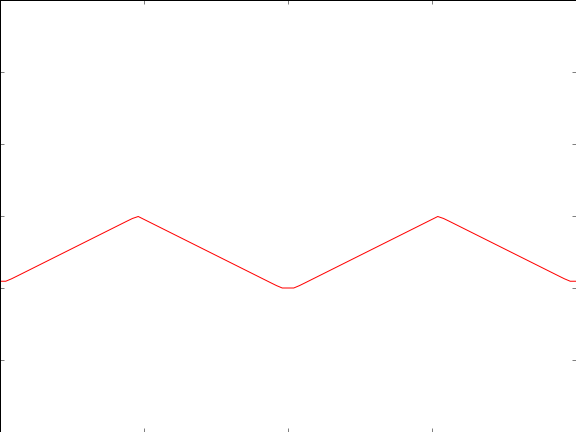

In [32]:
fig = plt.figure(figsize=(8, 6))
axis = fig.add_axes([0, 0, 1, 1])

def animate(i):
    axis.clear()
    axis.plot(x, result[i], 'r') #, x, result[1][i], 'b')
    axis.axis([a, b, -1, 2])

def init():
    axis.plot(x, result[0], 'r') #, x, result[1][0], 'b')
    axis.axis([a, b, -1, 2])


animation.FuncAnimation(fig, animate, frames=len(result), 
                        init_func=init,interval=300, blit=False)

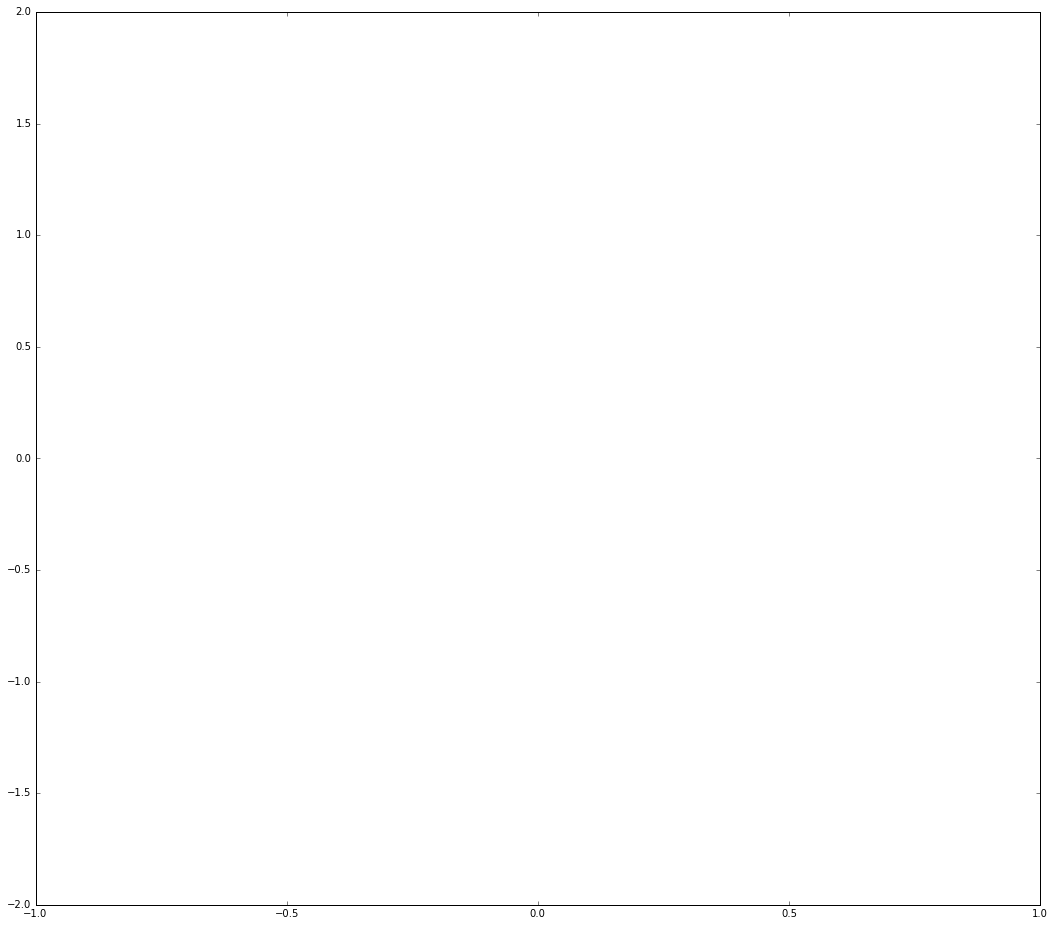

In [33]:
from matplotlib.animation import ArtistAnimation
fig = plt.figure(figsize=(18, 16)) 
ax  = fig.add_subplot(111) 

ax.set_xlim(-1, 1)
ax.set_ylim(-2,2)

images = []
for i in xrange(2*time):
    line, = ax.plot(x,result[i], '-')
    images.append((line,))
line_anim = ArtistAnimation(fig, images, interval=200, blit=False)
line_anim.save('3.mp4')